In [1]:
# for data manipulation 
import pandas as pd
import numpy as np

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# for data time manipulation
import datetime

In [2]:
data=pd.read_csv(r'C:\Users\Divya\Downloads\India Census 2011.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Hindus                640 non-null    int64 
 14  Muslims               640 non-null    int64 
 15  Christians            640 non-null    in

In [3]:
data.head()

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
0    439654   229064        190899           38165  ...        1700   5600   
1    335649   214866        162578           52288  ...        1489   5559   
2     93770    75079         53265           21814  ...         658   1092   
3     86236    51873         39839           12034  ...         604   1171   
4    261724   161393        117677           43716  ...         958  11188   

   Buddhists  Jains  Secondary_Education  Higher_Education  \
0         66     39                74948             39709   
1         47      6                66459             41367   
2      88635    103                16265              8923   
3      20126     28                16938              9826   
4         83     10                46062             29517   

   Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0               21751          600759           178435         89679  
1               27950          503223           160933         88978  
2                6197           70703            41515         21019  
3                3077           87532            35561         17488  
4               13962          304979           109818         61334  

[5 rows x 25 columns]

# data visualization 

## demographics and  population

In [6]:
# 1) population across different states

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\3981251554.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




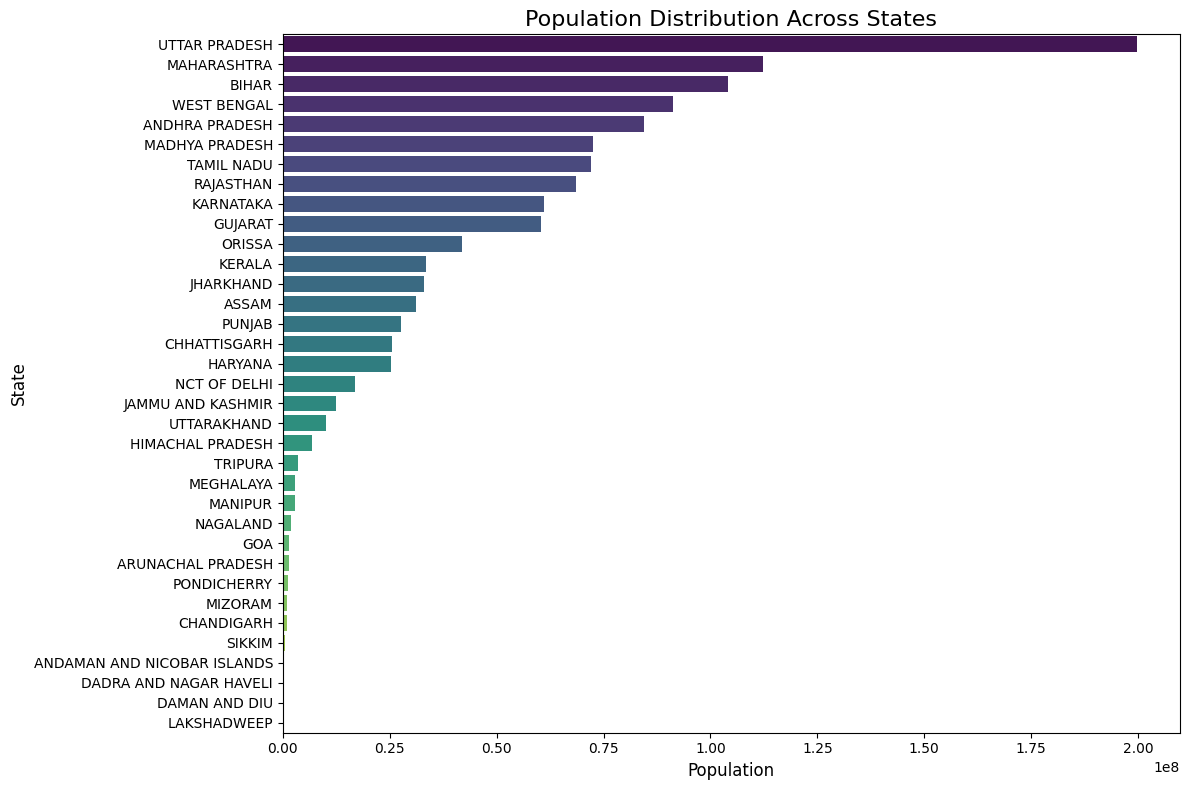

In [16]:
state_data=data.groupby('State_name')['Population'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=state_data.values,y=state_data.index,palette='viridis')
plt.xlabel("Population", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Population Distribution Across States", fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
state_data

State_name
UTTAR PRADESH                  199812341
MAHARASHTRA                    112374333
BIHAR                          104099452
WEST BENGAL                     91276115
ANDHRA PRADESH                  84580777
MADHYA PRADESH                  72626809
TAMIL NADU                      72147030
RAJASTHAN                       68548437
KARNATAKA                       61095297
GUJARAT                         60439692
ORISSA                          41974218
KERALA                          33406061
JHARKHAND                       32988134
ASSAM                           31205576
PUNJAB                          27743338
CHHATTISGARH                    25545198
HARYANA                         25351462
NCT OF DELHI                    16787941
JAMMU AND KASHMIR               12541302
UTTARAKHAND                     10086292
HIMACHAL PRADESH                 6864602
TRIPURA                          3673917
MEGHALAYA                        2966889
MANIPUR                          2855794
NAGAL

In [ ]:
# 2) How do male and female populations vary across districts?

In [18]:
data.head(2)

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   

   Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
0    439654   229064        190899           38165  ...        1700   5600   
1    335649   214866        162578           52288  ...        1489   5559   

   Buddhists  Jains  Secondary_Education  Higher_Education  \
0         66     39                74948             39709   
1         47      6                66459             41367   

   Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0               21751          600759           178435         89679  
1               27950          503223           160933         88978  

[2 rows x 25 columns]

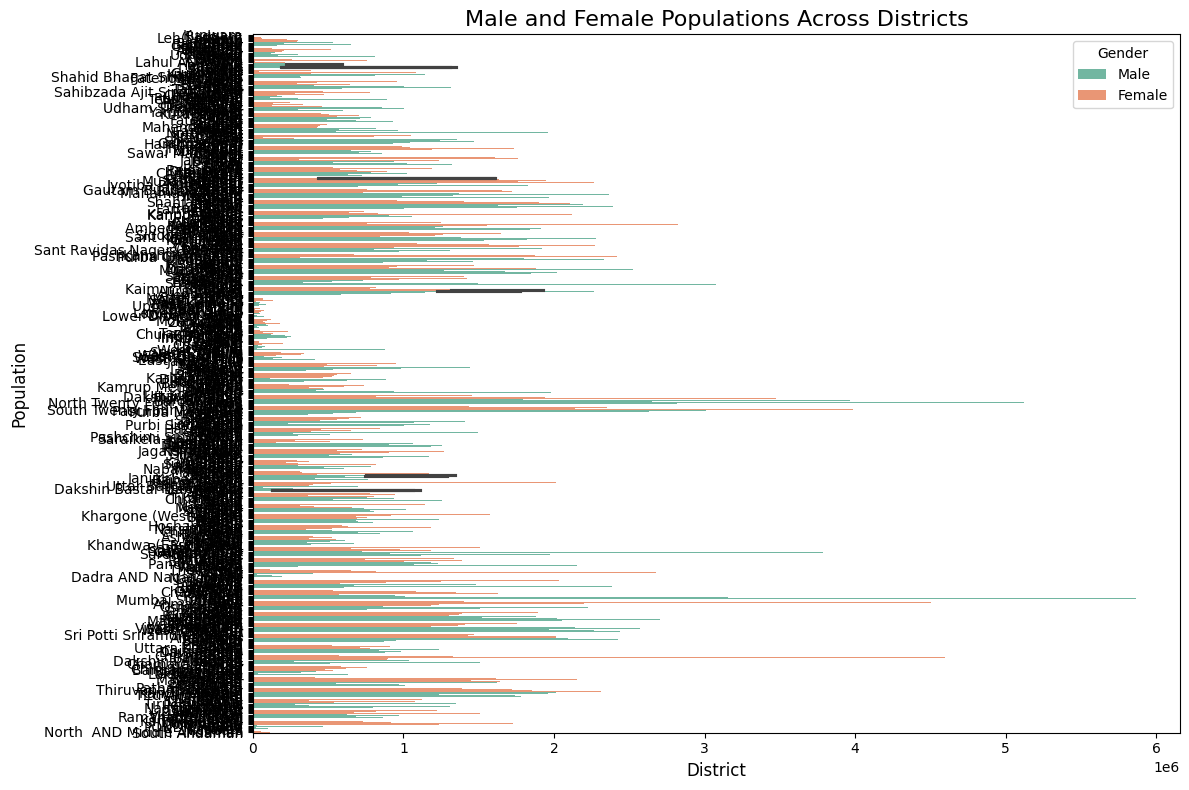

In [19]:
df_melted = data.melt(id_vars=['District_name', 'Population'], value_vars=['Male', 'Female'],
                    var_name='Gender', value_name='Pop')

# Grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Pop', y='District_name', hue='Gender', data=df_melted, palette='Set2')

plt.title("Male and Female Populations Across Districts", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [20]:
df_melted

District_name  Population  Gender     Pop
0                       Kupwara      870354    Male  474190
1                        Badgam      753745    Male  398041
2                   Leh(Ladakh)      133487    Male   78971
3                        Kargil      140802    Male   77785
4                         Punch      476835    Male  251899
...                         ...         ...     ...     ...
1275                       Mahe       41816  Female   22673
1276                   Karaikal      200222  Female  102413
1277                   Nicobars       36842  Female   16115
1278  North  AND Middle Andaman      105597  Female   50736
1279              South Andaman      238142  Female  110859

[1280 rows x 4 columns]

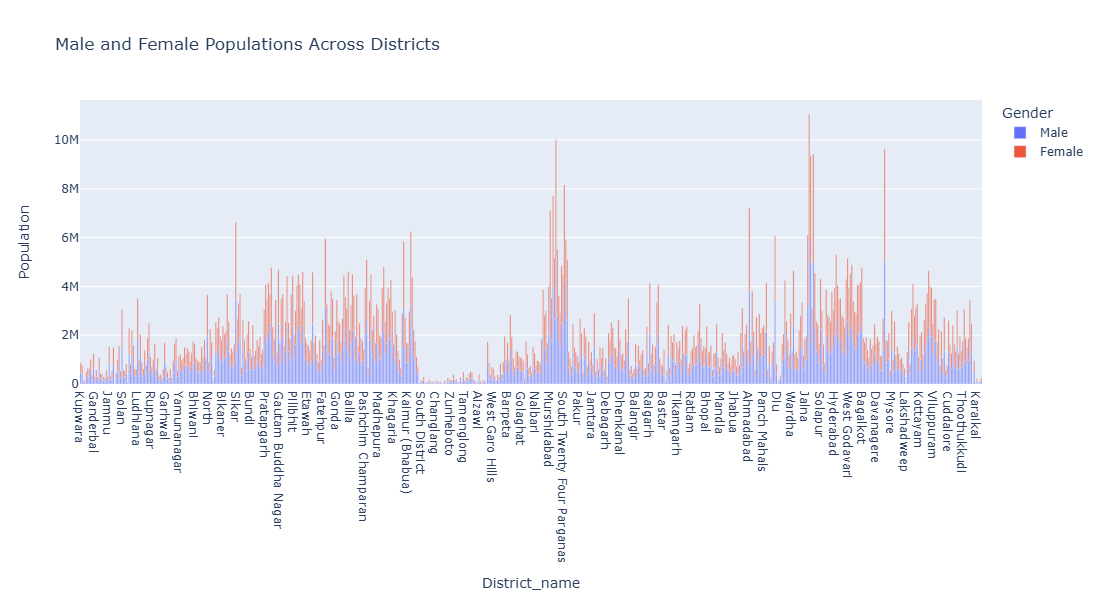

In [22]:
import plotly.express as px

# Create a Plotly bar chart
fig = px.bar(df_melted, x='District_name', y='Pop', color='Gender', 
             title="Male and Female Populations Across Districts",
             labels={'Pop': 'Population'}, 
             category_orders={'District_name': df_melted['District_name'].unique()},
             height=600)

# Show the plot
fig.show()


In [39]:
# 3) What is the ratio of male to female population for each state?

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\2446257393.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




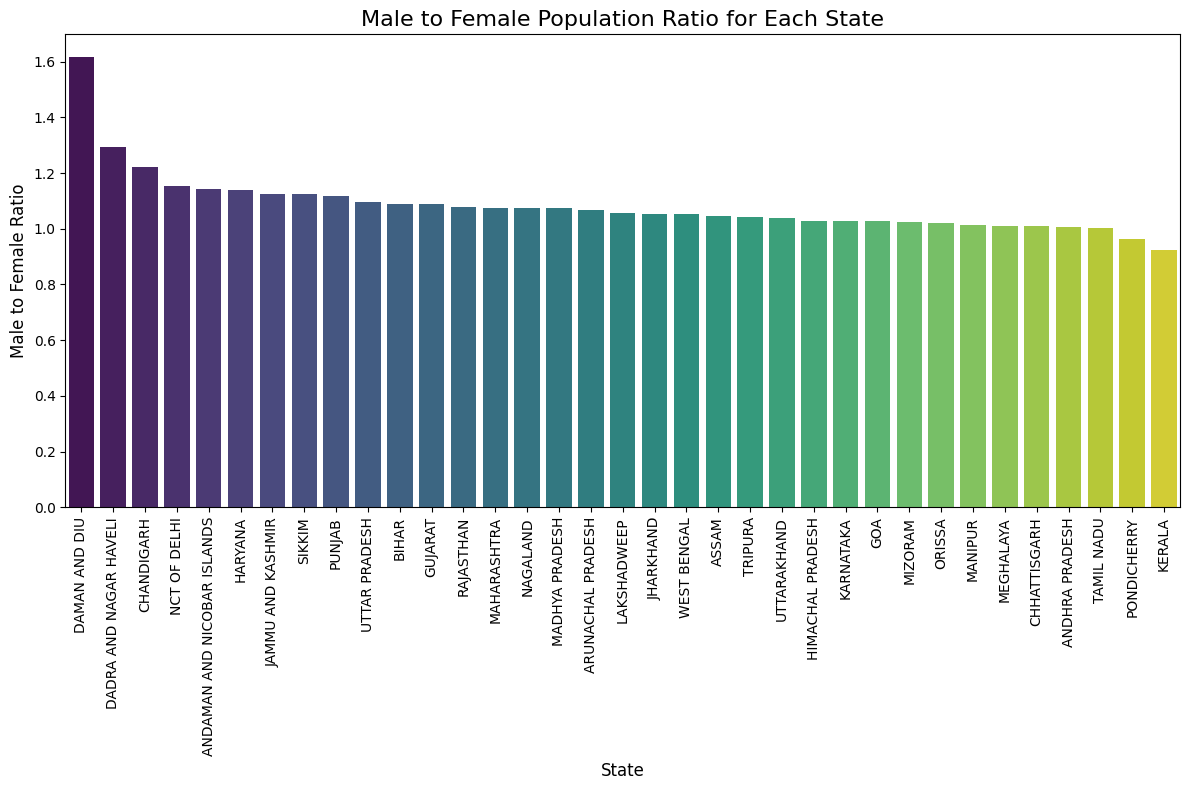

In [23]:
state_population=data.groupby('State_name')[['Male','Female']].sum()

# Calculate the male-to-female ratio
state_population['Male_to_Female_Ratio'] = state_population['Male'] / state_population['Female']
state_population_sorted = state_population.sort_values('Male_to_Female_Ratio', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=state_population_sorted.index, y='Male_to_Female_Ratio', data=state_population_sorted, palette='viridis')
plt.title("Male to Female Population Ratio for Each State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Male to Female Ratio", fontsize=12)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [24]:
state_population_sorted

Male    Female  Male_to_Female_Ratio
State_name                                                            
DAMAN AND DIU                   150301     92946              1.617079
DADRA AND NAGAR HAVELI          193760    149949              1.292173
CHANDIGARH                      580663    474787              1.222997
NCT OF DELHI                   8987326   7800615              1.152130
ANDAMAN AND NICOBAR ISLANDS     202871    177710              1.141585
HARYANA                       13494734  11856728              1.138150
JAMMU AND KASHMIR              6640662   5900640              1.125414
SIKKIM                          323070    287507              1.123694
PUNJAB                        14639465  13103873              1.117186
UTTAR PRADESH                104480510  95331831              1.095967
BIHAR                         54278157  49821295              1.089457
GUJARAT                       31491260  28948432              1.087840
RAJASTHAN                     35550997  32997440              1.077387
MAHARASHTRA                   58243056  54131277              1.075959
NAGALAND                       1024649    953853              1.074221
MADHYA PRADESH                37612306  35014503              1.074192
ARUNACHAL PRADESH               713912    669815              1.065835
LAKSHADWEEP                      33123     31350              1.056555
JHARKHAND                     16930315  16057819              1.054335
WEST BENGAL                   46809027  44467088              1.052667
ASSAM                         15939443  15266133              1.044105
TRIPURA                        1874376   1799541              1.041586
UTTARAKHAND                    5137773   4948519              1.038245
HIMACHAL PRADESH               3481873   3382729              1.029309
KARNATAKA                     30966657  30128640              1.027815
GOA                             739140    719405              1.027432
MIZORAM                         555339    541867              1.024862
ORISSA                        21212136  20762082              1.021677
MANIPUR                        1438586   1417208              1.015085
MEGHALAYA                      1491832   1475057              1.011372
CHHATTISGARH                  12832895  12712303              1.009486
ANDHRA PRADESH                42442146  42138631              1.007203
TAMIL NADU                    36137975  36009055              1.003580
PONDICHERRY                     612511    635442              0.963913
KERALA                        16027412  17378649              0.922247

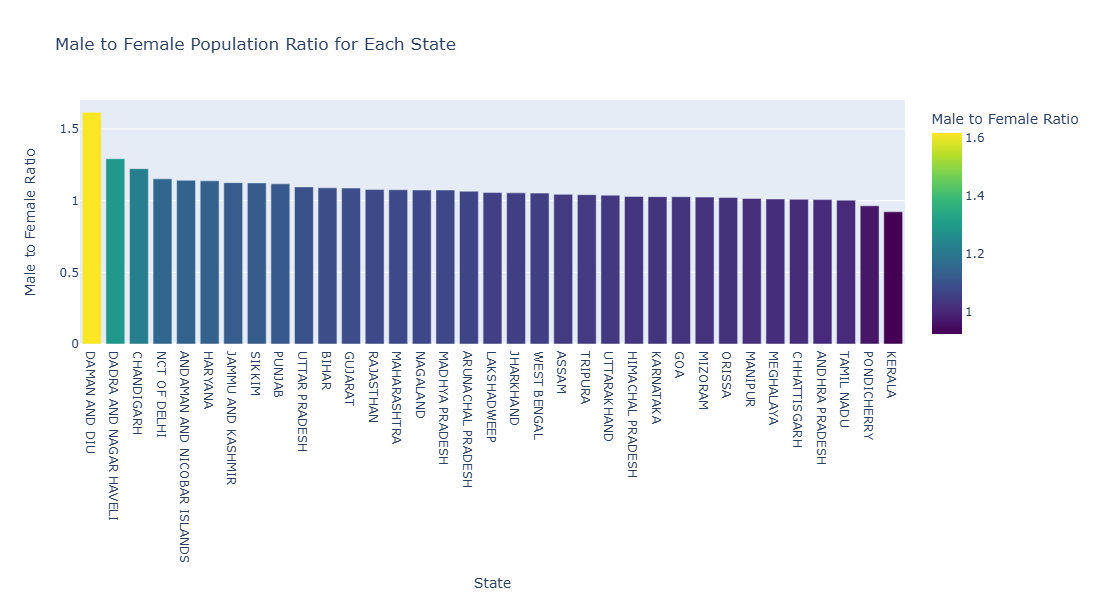

In [25]:
import plotly.express as px

state_population_sorted = state_population_sorted.reset_index()

# Create the bar plot
fig = px.bar(state_population_sorted, 
             x='State_name', 
             y='Male_to_Female_Ratio', 
             title="Male to Female Population Ratio for Each State",
             labels={'Male_to_Female_Ratio': 'Male to Female Ratio', 'State_name': 'State'},
             color='Male_to_Female_Ratio',  # Color by the ratio value
             color_continuous_scale='Viridis',  # Color scale
             height=600)

# Show the plot
fig.show()

In [47]:
# 4 Which districts have the highest and lowest populations?

In [29]:
sorted_df = data.sort_values(by='Population', ascending=False)

# Get the district with the highest population
highest_population_district = sorted_df.iloc[0]
print(highest_population_district[['District_name', 'Population']])
# Get the district with the lowest population
lowest_population_district = sorted_df.iloc[-1]
print(lowest_population_district[['District_name', 'Population']])

District_name       Thane
Population       11060148
Name: 516, dtype: object
District_name    Dibang Valley
Population                8004
Name: 256, dtype: object


##  Literacy

In [30]:
data.head(3)

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   

   Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
0    439654   229064        190899           38165  ...        1700   5600   
1    335649   214866        162578           52288  ...        1489   5559   
2     93770    75079         53265           21814  ...         658   1092   

   Buddhists  Jains  Secondary_Education  Higher_Education  \
0         66     39                74948             39709   
1         47      6                66459             41367   
2      88635    103                16265              8923   

   Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0               21751          600759           178435         89679  
1               27950          503223           160933         88978  
2                6197           70703            41515         21019  

[3 rows x 25 columns]

In [ ]:
# 1 What is the literacy rate distribution across districts?

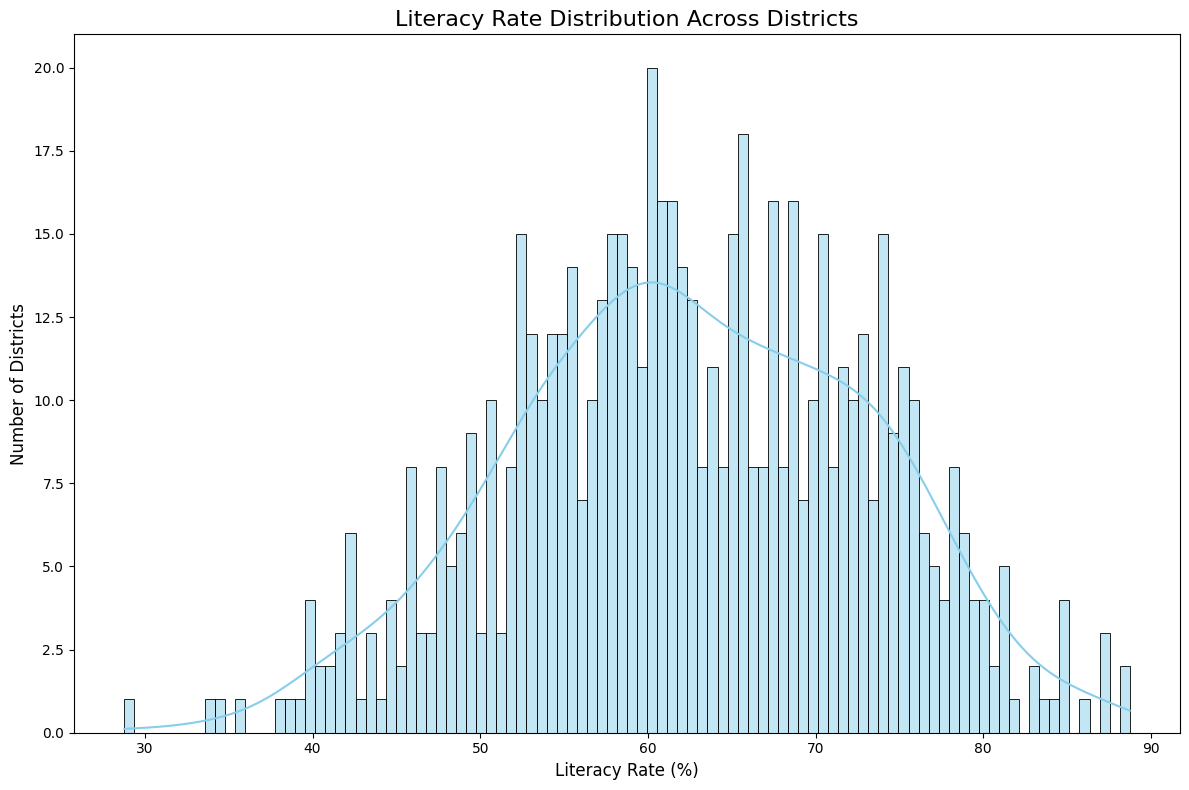

In [36]:
# Calculate Literacy Rate
data['Literacy_Rate'] = (data['Literate'] / data['Population']) * 100
plt.figure(figsize=(12, 8))
sns.histplot(data['Literacy_Rate'], bins=100, kde=True, color='skyblue')

# Formatting
plt.title("Literacy Rate Distribution Across Districts", fontsize=16)
plt.xlabel("Literacy Rate (%)", fontsize=12)
plt.ylabel("Number of Districts", fontsize=12)
plt.tight_layout()
plt.show()


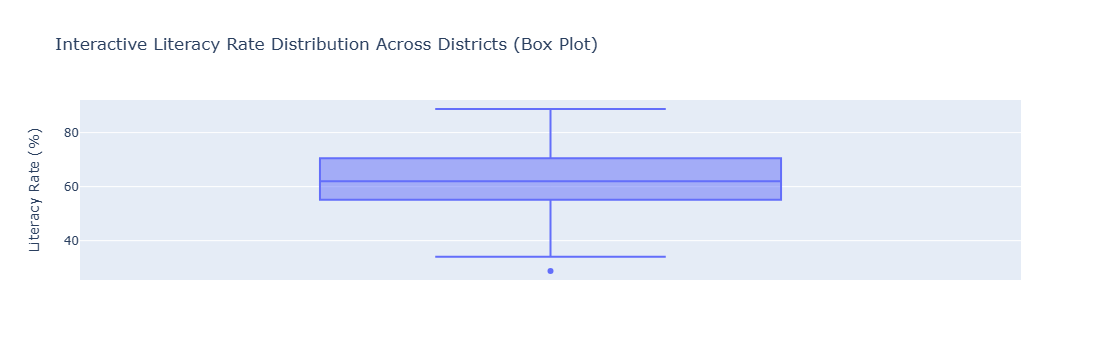

In [37]:
# interactive box plot for Literacy Rate distribution
fig = px.box(data, y='Literacy_Rate', title="Interactive Literacy Rate Distribution Across Districts (Box Plot)",
             labels={'Literacy_Rate': 'Literacy Rate (%)'})

# Show the plot
fig.show()

In [39]:
data['Literacy_Rate'].min()

28.77287897514263

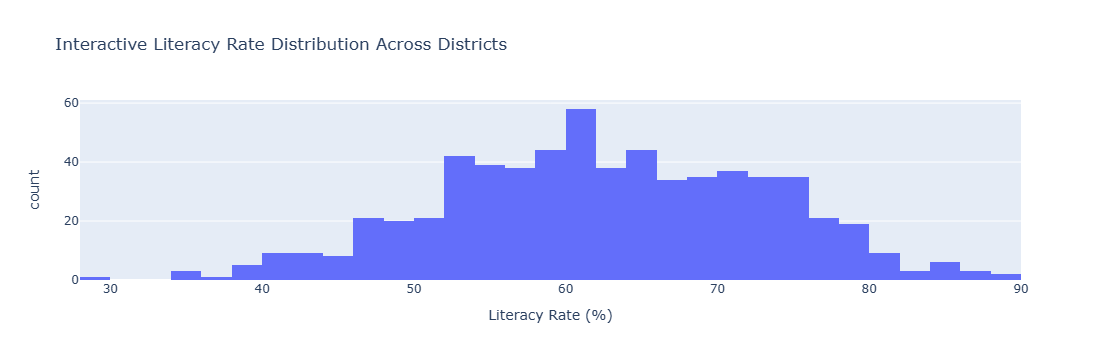

In [40]:
fig = px.histogram(data, x='Literacy_Rate', nbins=30, title="Interactive Literacy Rate Distribution Across Districts",
                   labels={'Literacy_Rate': 'Literacy Rate (%)'})

# Show the plot
fig.show()


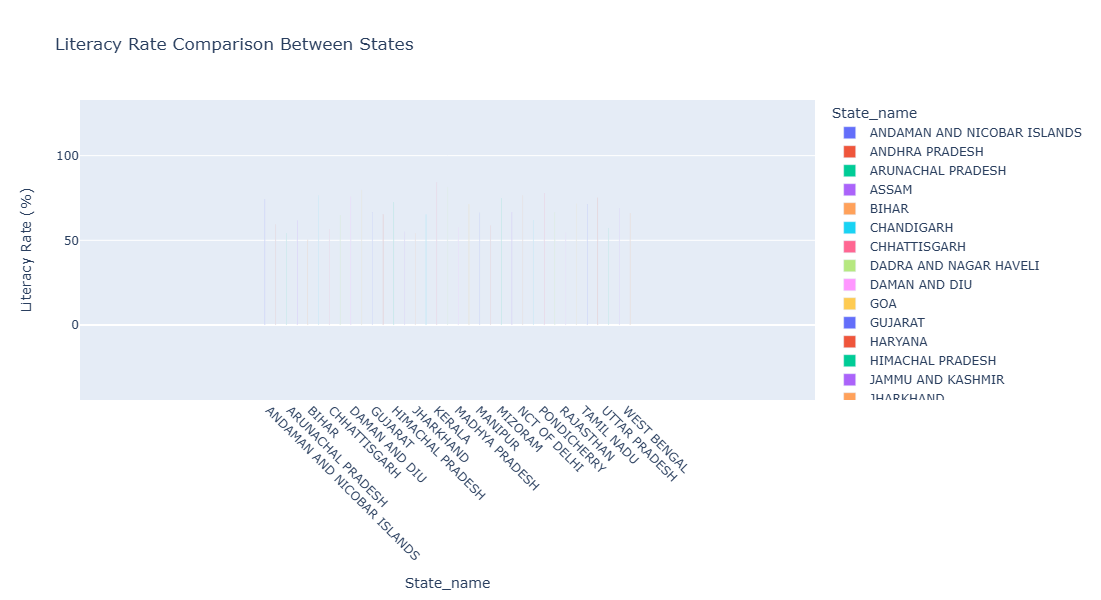

In [42]:
# 2  How does the literacy rate compare between states?

import plotly.express as px
state_literacy_rate = data.groupby('State_name')['Literacy_Rate'].mean().reset_index()
fig = px.bar(state_literacy_rate, x='State_name', y='Literacy_Rate', title="Literacy Rate Comparison Between States",
             labels={'Literacy_Rate': 'Literacy Rate (%)'},
             color='State_name', 
             text='Literacy_Rate'
             )  

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Format text with 2 decimal points
fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability
fig.update_layout(barmode='group', height=600)

# Show the plot
fig.show()


In [57]:
# 3 Is there a correlation between literacy and the number of workers in a district?

correlation = data[['Literacy_Rate', 'Workers']].corr()
print(correlation)

               Literacy_Rate   Workers
Literacy_Rate       1.000000  0.082957
Workers             0.082957  1.000000


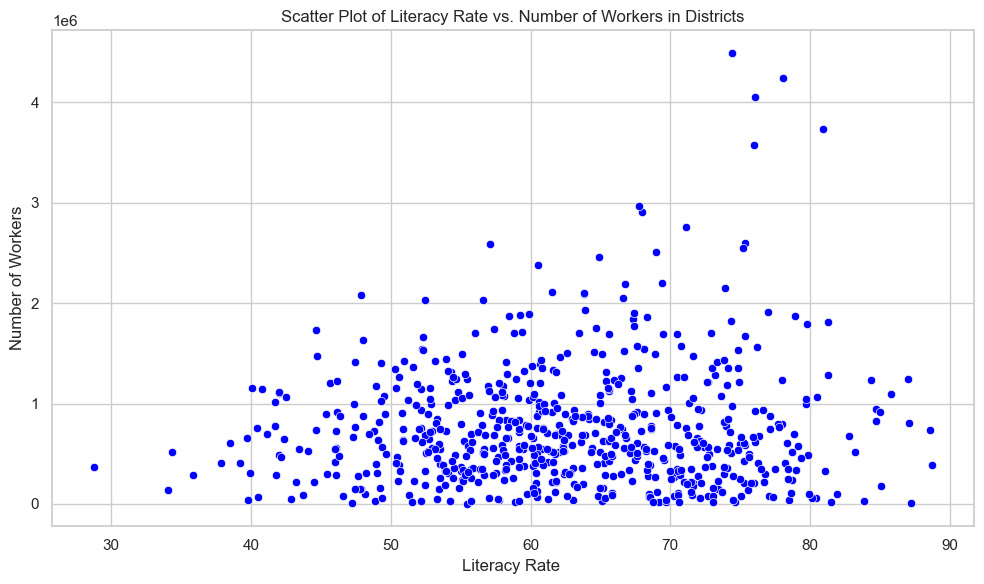

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy_Rate', y='Workers', data=data, color='blue')
plt.title('Scatter Plot of Literacy Rate vs. Number of Workers in Districts')
plt.xlabel('Literacy Rate ')
plt.ylabel('Number of Workers')
plt.tight_layout()
plt.show()

##  3. Workers

In [60]:
# 1 What is the proportion of male and female workers in each district?

In [61]:
data.head(2)

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   

   Literate  Workers  Male_Workers  Female_Workers  ...  Sikhs  Buddhists  \
0    439654   229064        190899           38165  ...   5600         66   
1    335649   214866        162578           52288  ...   5559         47   

   Jains  Secondary_Education  Higher_Education  Graduate_Education  \
0     39                74948             39709               21751   
1      6                66459             41367               27950   

   Age_Group_0_29  Age_Group_30_49  Age_Group_50  Literacy_Rate  
0          600759           178435         89679      50.514388  
1          503223           160933         88978      44.530843  

[2 rows x 26 columns]

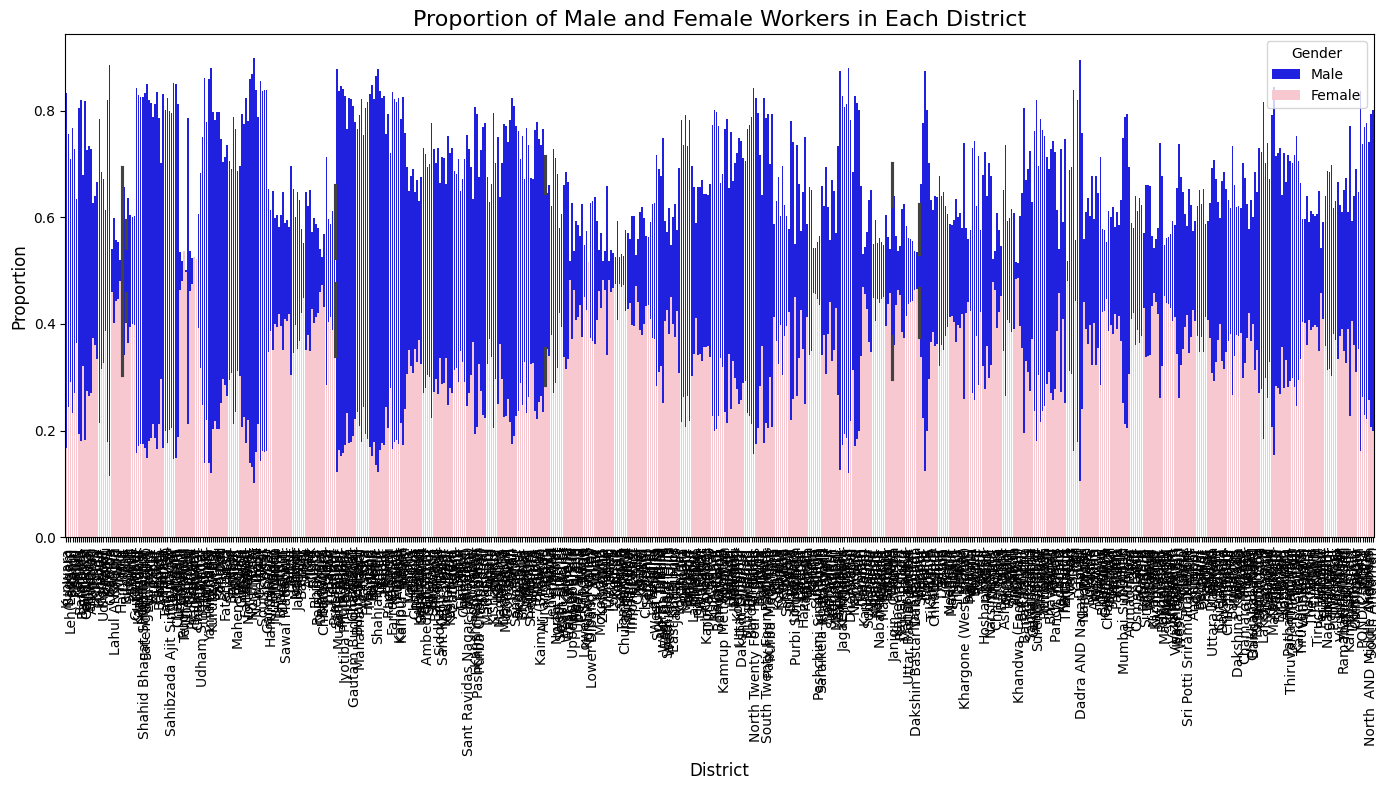

In [112]:
data['Male_Worker_Proportion'] = data['Male_Workers'] / data['Workers']
data['Female_Worker_Proportion'] = data['Female_Workers'] / data['Workers']

plt.figure(figsize=(14, 8))

# Grouped bar plot
sns.barplot(x='District_name', y='Male_Worker_Proportion', data=data, color='blue', label='Male')
sns.barplot(x='District_name', y='Female_Worker_Proportion', data=data, color='pink', label='Female')

plt.title("Proportion of Male and Female Workers in Each District", fontsize=16)
plt.xlabel("District", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=90)  
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [113]:
data.head()

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Workers  Male_Workers  Female_Workers  ...  Literacy_Rate  \
0    439654   229064        190899           38165  ...      50.514388   
1    335649   214866        162578           52288  ...      44.530843   
2     93770    75079         53265           21814  ...      70.246541   
3     86236    51873         39839           12034  ...      61.246289   
4    261724   161393        117677           43716  ...      54.887749   

   Total_Population  Higher_Education_Percentage  \
0            867819                     4.562396   
1            753265                     5.488196   
2            132427                     6.684546   
3            140509                     6.978594   
4            476122                     6.190192   

   Secondary_Education_Percentage  Graduate_Education_Percentage  \
0                        8.611209                       2.499098   
1                        8.817173                       3.708151   
2                       12.184707                       4.642400   
3                       12.029659                       2.185338   
4                        9.659945                       2.928057   

   Age_Group_0_29_Percentage  Age_Group_30_49_Percentage  \
0                  69.024673                   20.501428   
1                  66.763030                   21.351120   
2                  52.966206                   31.100407   
3                  62.166731                   25.256033   
4                  63.959021                   23.030608   

   Age_Group_50_Percentage  Male_Worker_Proportion  Female_Worker_Proportion  
0                10.303738                0.833387                  0.166613  
1                11.804788                0.756648                  0.243352  
2                15.746103                0.709453                  0.290547  
3                12.420278                0.768010                  0.231990  
4                12.862730                0.729133                  0.270867  

[5 rows x 35 columns]

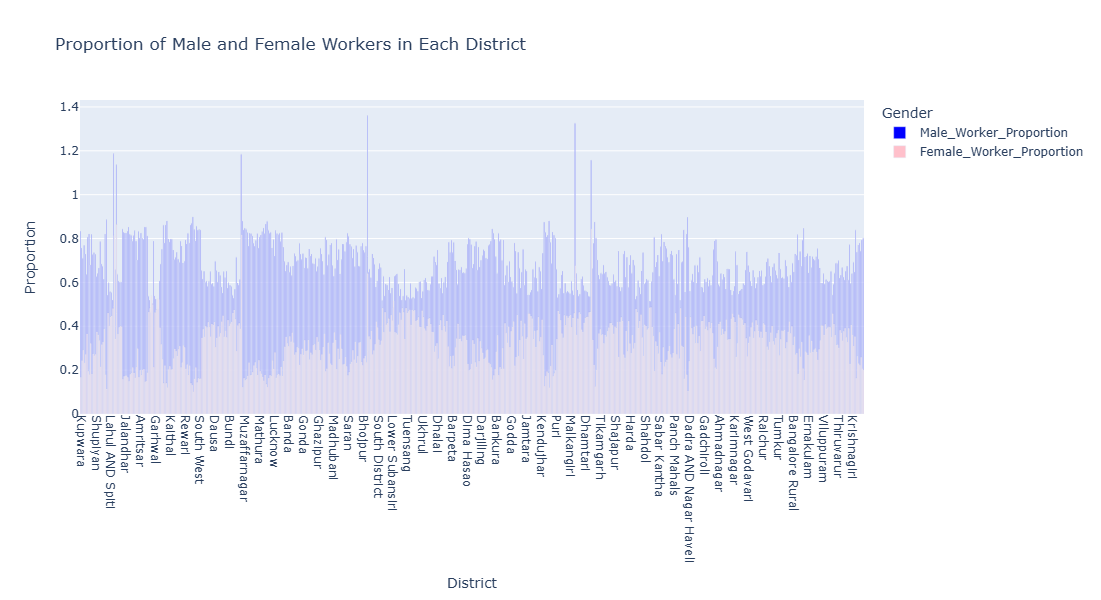

In [114]:
import plotly.express as px

data['Male_Worker_Proportion'] = data['Male_Workers'] / data['Workers']
data['Female_Worker_Proportion'] = data['Female_Workers'] / data['Workers']

fig = px.bar(data, x='District_name', 
             y=['Male_Worker_Proportion', 'Female_Worker_Proportion'],
             title="Proportion of Male and Female Workers in Each District",
             labels={'District_name': 'District', 
                     'value': 'Proportion', 
                     'variable': 'Gender'},
             barmode='group', 
             color='variable',
             color_discrete_map={'Male_Worker_Proportion': 'blue', 'Female_Worker_Proportion': 'pink'},
             text='value')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Add interactive features
fig.update_layout(
    xaxis_title="District",
    yaxis_title="Proportion",
    xaxis_tickangle=90,  
    height=600
)
fig.show()


In [64]:
# 2 How does the number of workers vary across different states?

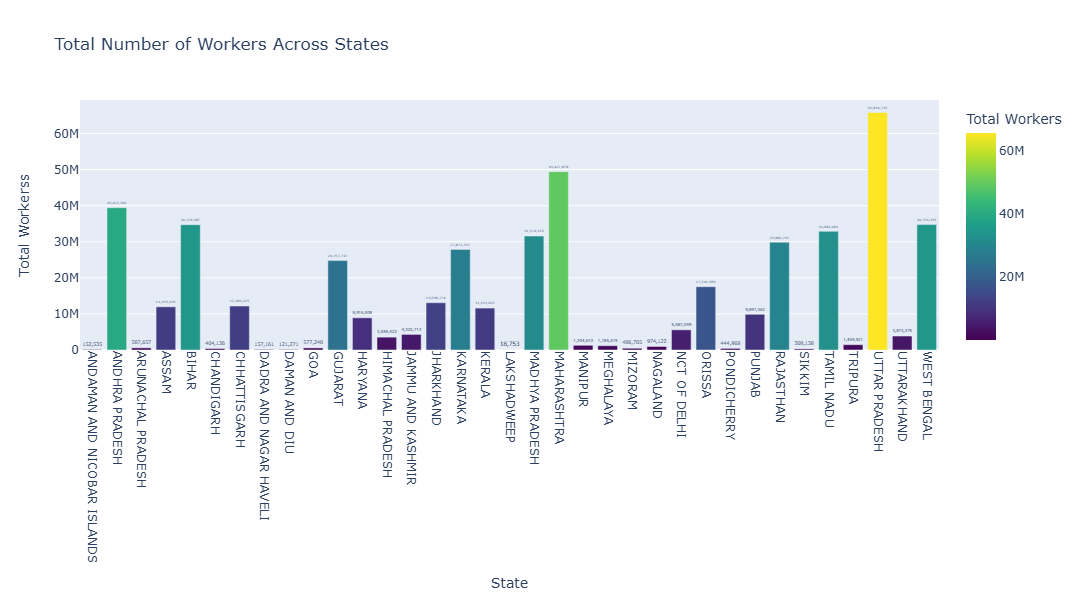

In [117]:
import plotly.express as px

state_workers = data.groupby('State_name')['Workers'].sum().reset_index()
fig = px.bar(state_workers, x='State_name', y='Workers',
             title="Total Number of Workers Across States",
             labels={'Workers': 'Total Workers', 'State_name': 'State'},
             color='Workers', 
             color_continuous_scale='Viridis',
             text='Workers')
fig.update_traces(texttemplate='%{text:,}', textposition='outside')

# Add interactive features
fig.update_layout(
    xaxis_title="State",
    yaxis_title="Total Workerss",
    xaxis_tickangle=90, 
    height=600
)

# Show the plot
fig.show()


In [118]:
state_workers

State_name   Workers
0   ANDAMAN AND NICOBAR ISLANDS    152535
1                ANDHRA PRADESH  39422906
2             ARUNACHAL PRADESH    587657
3                         ASSAM  11969690
4                         BIHAR  34724987
5                    CHANDIGARH    404136
6                  CHHATTISGARH  12180225
7        DADRA AND NAGAR HAVELI    157161
8                 DAMAN AND DIU    121271
9                           GOA    577248
10                      GUJARAT  24767747
11                      HARYANA   8916508
12             HIMACHAL PRADESH   3559422
13            JAMMU AND KASHMIR   4322713
14                    JHARKHAND  13098274
15                    KARNATAKA  27872597
16                       KERALA  11619063
17                  LAKSHADWEEP     18753
18               MADHYA PRADESH  31574133
19                  MAHARASHTRA  49427878
20                      MANIPUR   1304610
21                    MEGHALAYA   1185619
22                      MIZORAM    486705
23                     NAGALAND    974122
24                 NCT OF DELHI   5587049
25                       ORISSA  17541589
26                  PONDICHERRY    444968
27                       PUNJAB   9897362
28                    RAJASTHAN  29886255
29                       SIKKIM    308138
30                   TAMIL NADU  32884681
31                      TRIPURA   1469521
32                UTTAR PRADESH  65814715
33                  UTTARAKHAND   3872275
34                  WEST BENGAL  34756355

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\2998474787.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




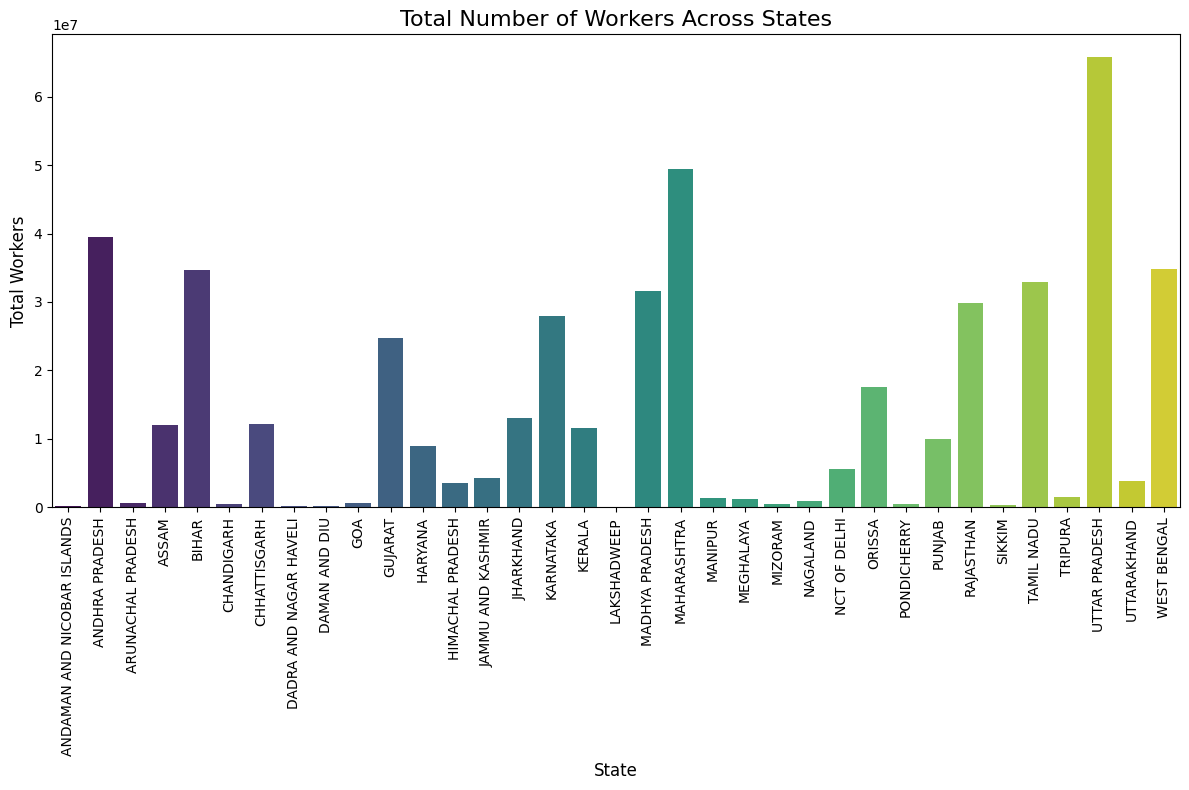

In [119]:
plt.figure(figsize=(12, 8))

sns.barplot(x='State_name', y='Workers', data=state_workers, palette='viridis')
plt.xticks(rotation=90) 
plt.title("Total Number of Workers Across States", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Workers", fontsize=12)

plt.tight_layout()
plt.show()

In [128]:
x=data.groupby('State_name')[['Male_Workers','Female_Workers']].sum().reset_index()
x

State_name  Male_Workers  Female_Workers
0   ANDAMAN AND NICOBAR ISLANDS        120889           31646
1                ANDHRA PRADESH      24185595        15237311
2             ARUNACHAL PRADESH        350273          237384
3                         ASSAM       8541560         3428130
4                         BIHAR      25222189         9502798
5                    CHANDIGARH        328159           75977
6                  CHHATTISGARH       7133866         5046359
7        DADRA AND NAGAR HAVELI        119293           37868
8                 DAMAN AND DIU        107434           13837
9                           GOA        419536          157712
10                      GUJARAT      18000914         6766833
11                      HARYANA       6806636         2109872
12             HIMACHAL PRADESH       2043373         1516049
13            JAMMU AND KASHMIR       3195090         1127623
14                    JHARKHAND       8424769         4673505
15                    KARNATAKA      18270116         9602481
16                       KERALA       8451569         3167494
17                  LAKSHADWEEP         15318            3435
18               MADHYA PRADESH      20146970        11427163
19                  MAHARASHTRA      32616875        16811003
20                      MANIPUR        739408          565202
21                    MEGHALAYA        703709          481910
22                      MIZORAM        290740          195965
23                     NAGALAND        547357          426765
24                 NCT OF DELHI       4762026          825023
25                       ORISSA      11902655         5638934
26                  PONDICHERRY        332931          112037
27                       PUNJAB       8074157         1823205
28                    RAJASTHAN      18297076        11589179
29                       SIKKIM        194358          113780
30                   TAMIL NADU      21434978        11449703
31                      TRIPURA       1045326          424195
32                UTTAR PRADESH      49846762        15967953
33                  UTTARAKHAND       2551921         1320354
34                  WEST BENGAL      26716047         8040308

In [120]:
data.head(2)



District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   

   Literate  Workers  Male_Workers  Female_Workers  ...  Literacy_Rate  \
0    439654   229064        190899           38165  ...      50.514388   
1    335649   214866        162578           52288  ...      44.530843   

   Total_Population  Higher_Education_Percentage  \
0            867819                     4.562396   
1            753265                     5.488196   

   Secondary_Education_Percentage  Graduate_Education_Percentage  \
0                        8.611209                       2.499098   
1                        8.817173                       3.708151   

   Age_Group_0_29_Percentage  Age_Group_30_49_Percentage  \
0                  69.024673                   20.501428   
1                  66.763030                   21.351120   

   Age_Group_50_Percentage  Male_Worker_Proportion  Female_Worker_Proportion  
0                10.303738                0.833387                  0.166613  
1                11.804788                0.756648                  0.243352  

[2 rows x 35 columns]

In [70]:
# 3 What is the distribution of cultivator workers across districts?

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\2192513593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District_name', y='Cultivator_Workers', data=data, palette='viridis')


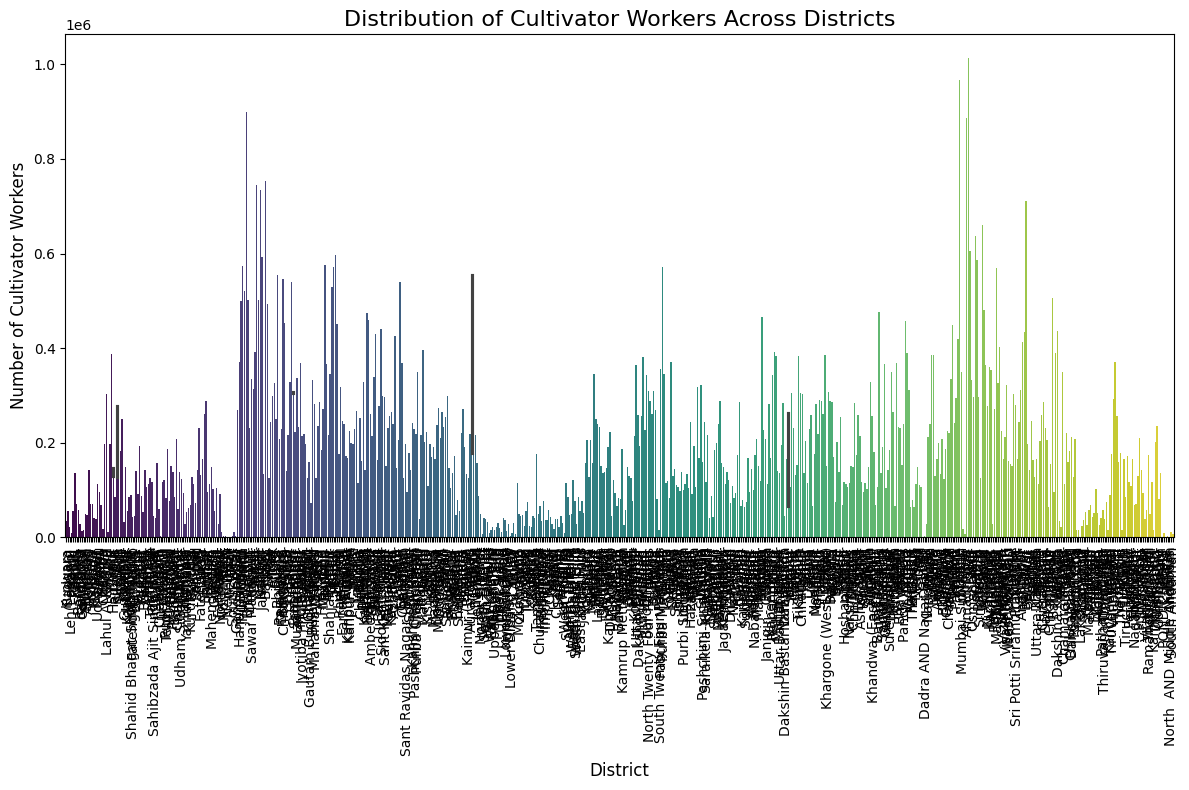

In [4]:


# Bar plot for cultivator workers across districts
plt.figure(figsize=(12, 8))
sns.barplot(x='District_name', y='Cultivator_Workers', data=data, palette='viridis')

# Formatting the plot
plt.title('Distribution of Cultivator Workers Across Districts', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Cultivator Workers', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


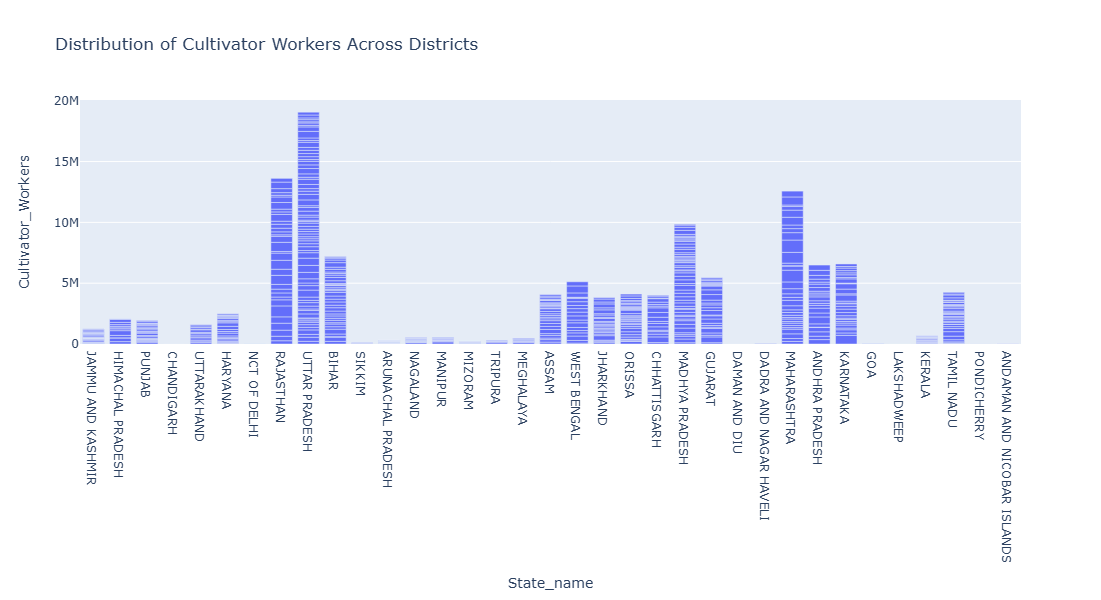

In [127]:
fig=px.bar(data,x=data['State_name'],y=data['Cultivator_Workers'],
               title='Distribution of Cultivator Workers Across Districts',
               height=600)
fig.show()

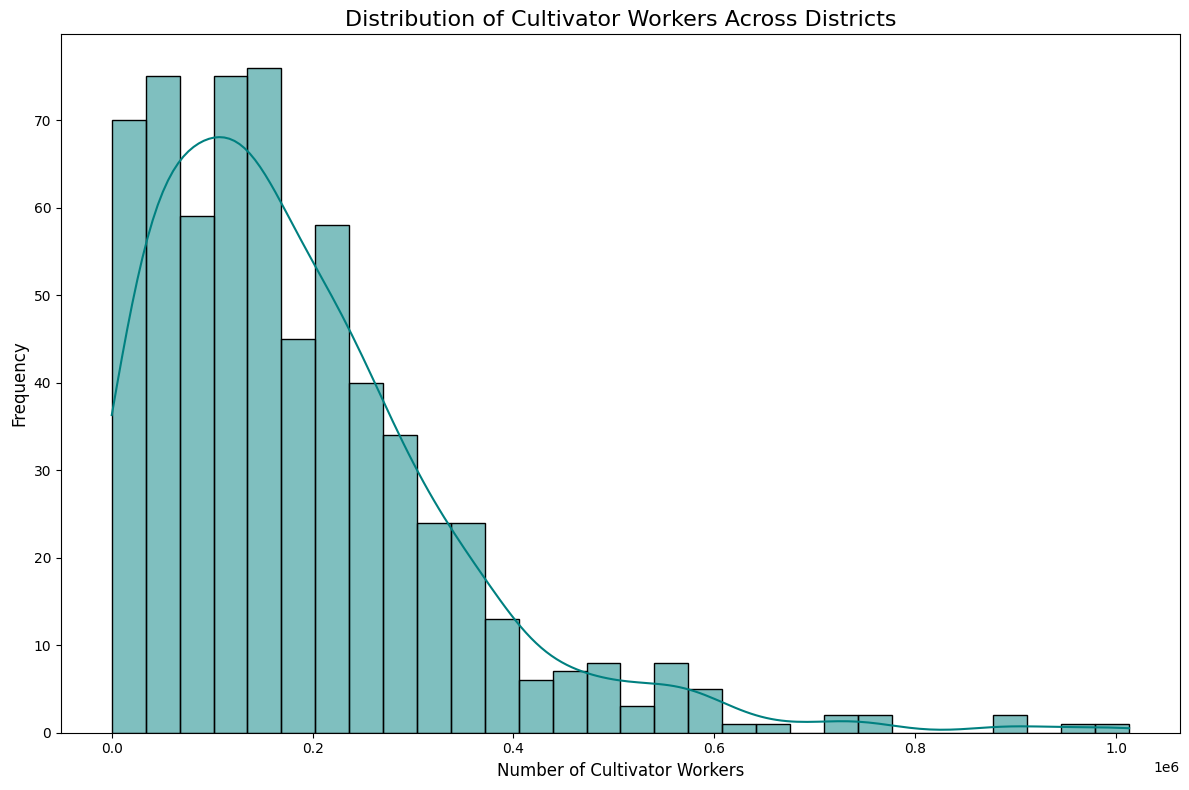

In [6]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Cultivator_Workers'], bins=30, kde=True, color='teal')

plt.title('Distribution of Cultivator Workers Across Districts', fontsize=16)
plt.xlabel('Number of Cultivator Workers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
# 4 How do agricultural workers compare to household workers in different districts?

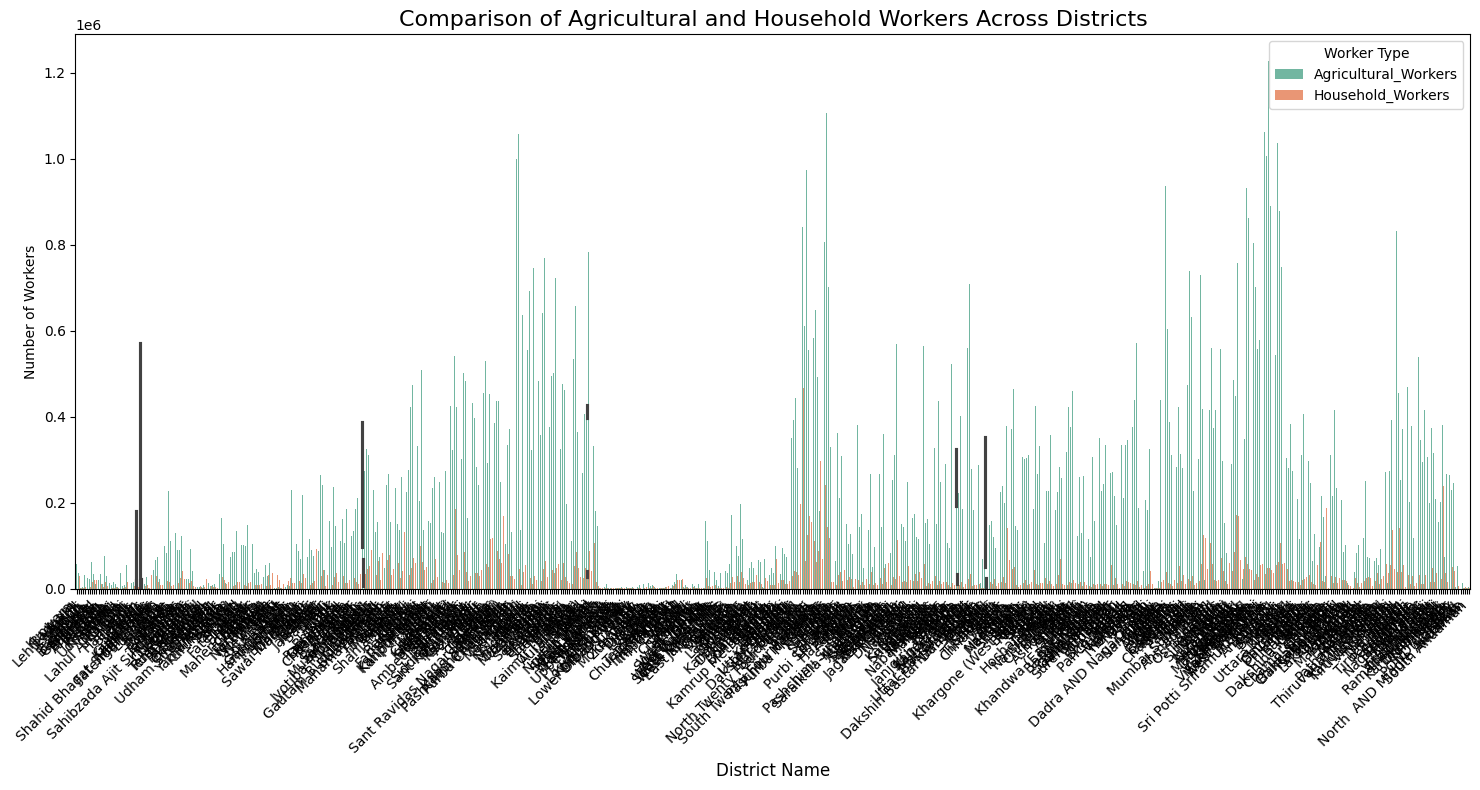

In [9]:
worker_comparison = data[['District_name', 'Agricultural_Workers', 'Household_Workers']]
worker_comparison_melted = worker_comparison.melt(id_vars='District_name', 
                                                  value_vars=['Agricultural_Workers', 'Household_Workers'], 
                                                  var_name='Worker_Type', 
                                                  value_name='Worker_Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='District_name', y='Worker_Count', hue='Worker_Type', data=worker_comparison_melted, palette='Set2')

plt.title('Comparison of Agricultural and Household Workers Across Districts', fontsize=16)
plt.xlabel('District Name', fontsize=12)
plt.ylabel('Number of Workers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Worker Type')
plt.tight_layout()
plt.show()


In [130]:
worker_comparison_melted

District_name           Worker_Type  Worker_Count
0                       Kupwara  Agricultural_Workers         56759
1                        Badgam  Agricultural_Workers         36630
2                   Leh(Ladakh)  Agricultural_Workers          1645
3                        Kargil  Agricultural_Workers          3763
4                         Punch  Agricultural_Workers         31583
...                         ...                   ...           ...
1275                       Mahe     Household_Workers            69
1276                   Karaikal     Household_Workers          1327
1277                   Nicobars     Household_Workers          2560
1278  North  AND Middle Andaman     Household_Workers           260
1279              South Andaman     Household_Workers           907

[1280 rows x 3 columns]

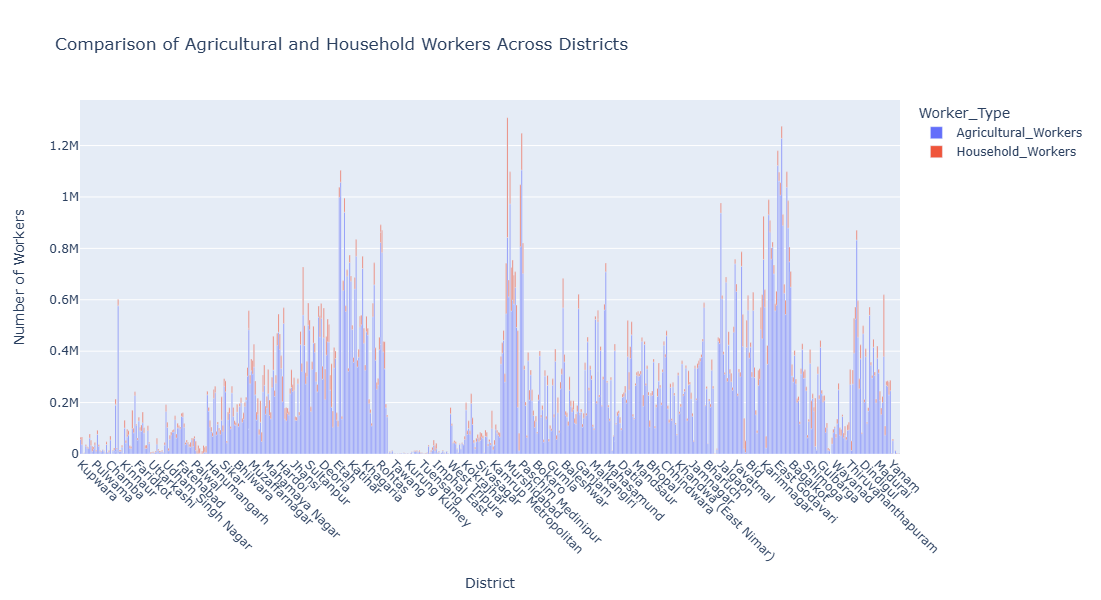

In [131]:
import plotly.express as px
worker_comparison = data[['District_name', 'Agricultural_Workers', 'Household_Workers']].set_index('District_name')
worker_comparison_reset = worker_comparison.reset_index().melt(id_vars='District_name', 
                                                               value_vars=['Agricultural_Workers', 'Household_Workers'], 
                                                               var_name='Worker_Type', 
                                                               value_name='Worker_Count')
fig = px.bar(worker_comparison_reset, x='District_name', y='Worker_Count', color='Worker_Type',
             title='Comparison of Agricultural and Household Workers Across Districts',
             labels={'Worker_Count': 'Number of Workers', 'District_name': 'District'},
              height=600)

fig.update_layout(xaxis_tickangle=45)
fig.show()


In [12]:
#5 What is the relationship between total workers and population in a district

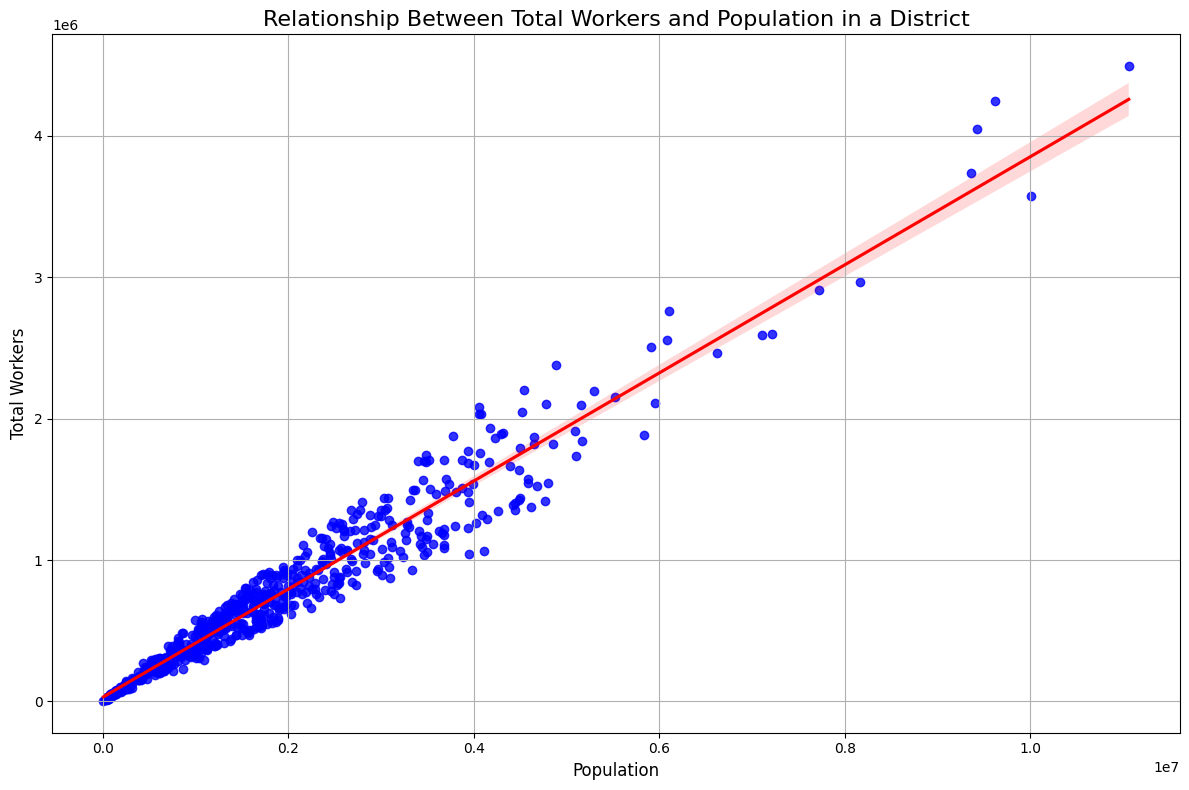

In [14]:

plt.figure(figsize=(12, 8))
sns.regplot(x='Population', y='Workers', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship Between Total Workers and Population in a District', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Total Workers', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


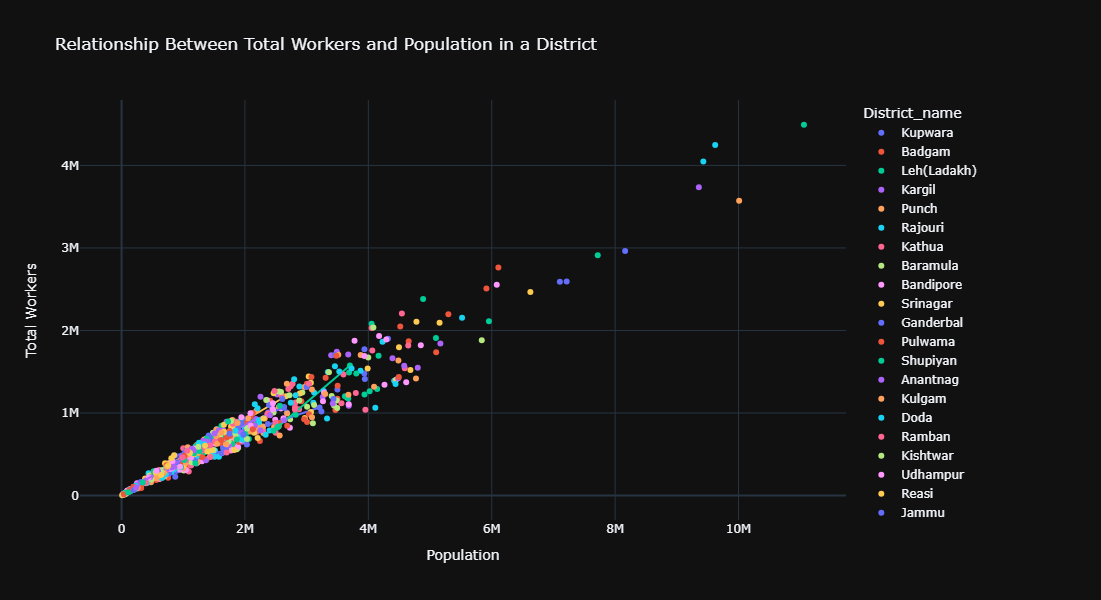

In [43]:
import plotly.express as px

# Scatter plot with Plotly
fig = px.scatter(data, x='Population', y='Workers', 
                 title='Relationship Between Total Workers and Population in a District',
                 labels={'Population': 'Population', 'Workers': 'Total Workers'},
                 trendline='ols',  # Adds a regression line
                 color='District_name',  
                 hover_data=['District_name'])  

# Update layout
fig.update_layout(template='plotly_dark', height=600)
fig.show()


#  Religion 

### 1 What is the distribution of Hindus, Muslims, Christians, Sikhs, Buddhists, and Jains in the dataset? 

In [45]:
data.head(2)

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   

   Literate  Workers  Male_Workers  Female_Workers  ...  Sikhs  Buddhists  \
0    439654   229064        190899           38165  ...   5600         66   
1    335649   214866        162578           52288  ...   5559         47   

   Jains  Secondary_Education  Higher_Education  Graduate_Education  \
0     39                74948             39709               21751   
1      6                66459             41367               27950   

   Age_Group_0_29  Age_Group_30_49  Age_Group_50  Literacy_Rate  
0          600759           178435         89679      50.514388  
1          503223           160933         88978      44.530843  

[2 rows x 26 columns]

In [134]:
religion_data = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']
population_data=data[religion_data].sum()

religion_df=pd.DataFrame({'Religion':religion_data,'Population':population_data.values})
print(religion_df)


     Religion  Population
0      Hindus   966257353
1     Muslims   172245158
2  Christians    27819588
3       Sikhs    20833116
4   Buddhists     8442972
5       Jains     4451753


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1966405813.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




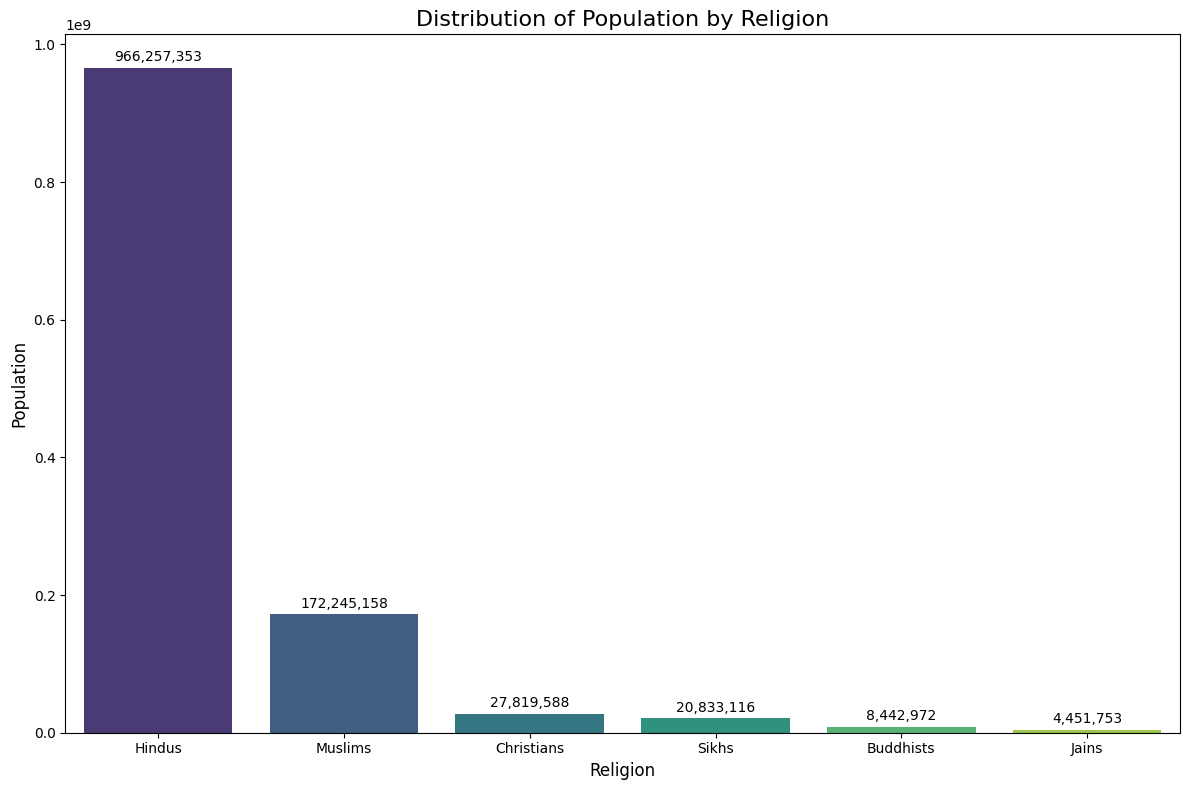

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(x='Religion',y='Population',data=religion_df,palette='viridis')
plt.title('Distribution of Population by Religion', fontsize=16)
plt.xlabel('Religion', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.tight_layout()

for i, value in enumerate(religion_df['Population']):
    plt.text(i, value + 0.01 * max(religion_df['Population']), f"{value:,.0f}", 
             ha='center', fontsize=10) 
plt.show()

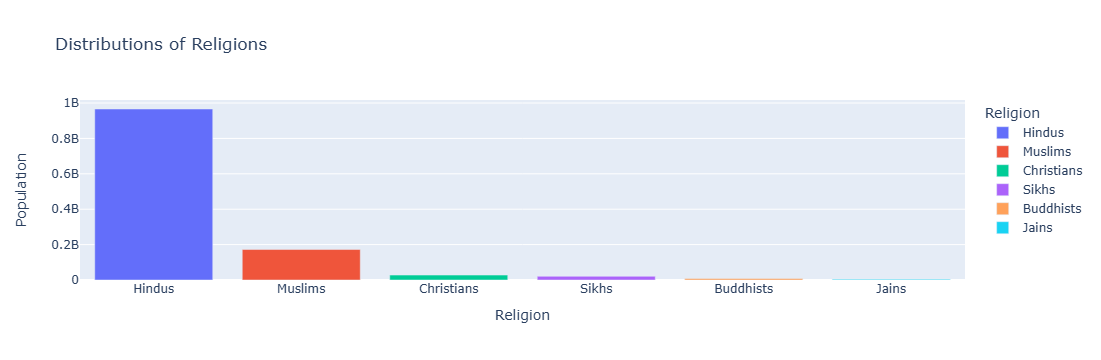

In [67]:
import plotly.express as px
fig=px.bar(religion_df,x='Religion',y='Population',
          color='Religion',title='Distributions of Religions'
          )
fig.show()

### 2 How does the religious composition vary across states? 

In [68]:
data.head(2)

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   

   Literate  Workers  Male_Workers  Female_Workers  ...  Sikhs  Buddhists  \
0    439654   229064        190899           38165  ...   5600         66   
1    335649   214866        162578           52288  ...   5559         47   

   Jains  Secondary_Education  Higher_Education  Graduate_Education  \
0     39                74948             39709               21751   
1      6                66459             41367               27950   

   Age_Group_0_29  Age_Group_30_49  Age_Group_50  Literacy_Rate  
0          600759           178435         89679      50.514388  
1          503223           160933         88978      44.530843  

[2 rows x 26 columns]

In [136]:
religion_by_state = data.groupby('State_name')[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].sum()

religion_by_state_percentage = religion_by_state.div(religion_by_state.sum(axis=1), axis=0) * 100

In [138]:
religion_by_state_percentage

Hindus    Muslims  Christians      Sikhs  \
State_name                                                                 
ANDAMAN AND NICOBAR ISLANDS  69.671120   8.544397   21.348208   0.339003   
ANDHRA PRADESH               88.899490   9.602813    1.342310   0.047814   
ARUNACHAL PRADESH            39.612193   2.665777   41.273659   0.323994   
ASSAM                        61.619811  34.308299    3.745446   0.066411   
BIHAR                        82.900378  16.909517    0.124475   0.022901   
CHANDIGARH                   80.874795   4.880240    0.827175  13.121828   
CHHATTISGARH                 95.175065   2.057741    1.960024   0.279838   
DADRA AND NAGAR HAVELI       94.146893   3.768127    1.490979   0.063278   
DAMAN AND DIU                90.625425   7.935436    1.160862   0.070804   
GOA                          66.234552   8.353490   25.159286   0.101220   
GUJARAT                      88.683365   9.685631    0.523774   0.096489   
HARYANA                      87.609709   7.039013    0.198971   4.914714   
HIMACHAL PRADESH             95.290207   2.186240    0.184461   1.165403   
JAMMU AND KASHMIR            28.488467  68.431966    0.284599   1.875826   
JHARKHAND                    78.008810  16.713126    4.945641   0.248996   
KARNATAKA                    84.240318  12.956880    1.875715   0.047232   
KERALA                       54.885422  26.638833   18.436553   0.011450   
LAKSHADWEEP                   2.776311  96.686438    0.492221   0.012422   
MADHYA PRADESH               91.766297   6.638012    0.296515   0.210500   
MAHARASHTRA                  80.157087  11.590795    0.965134   0.199490   
MANIPUR                      45.264257   9.185395   45.155757   0.058482   
MEGHALAYA                    12.674062   4.831310   81.993116   0.112818   
MIZORAM                       2.751211   1.354061   87.306504   0.026110   
NAGALAND                      8.771234   2.481688   88.174135   0.095795   
NCT OF DELHI                 81.755230  12.870655    0.871046   3.401957   
ORISSA                       94.884855   2.201092    2.804772   0.053094   
PONDICHERRY                  87.456158   6.065525    6.305879   0.023843   
PUNJAB                       38.626085   1.937027    1.259654  57.894082   
RAJASTHAN                    88.581489   9.076717    0.140823   1.274796   
SIKKIM                       59.526136   1.665460   10.215563   0.315301   
TAMIL NADU                   87.821075   5.878274    6.140747   0.020293   
TRIPURA                      83.550160   8.618210    4.359853   0.029178   
UTTAR PRADESH                79.969760  19.317697    0.178925   0.323016   
UTTARAKHAND                  83.074178  13.965338    0.375046   2.346111   
WEST BENGAL                  71.455693  27.362160    0.730941   0.070498   

                             Buddhists     Jains  
State_name                                        
ANDAMAN AND NICOBAR ISLANDS   0.089100  0.008172  
ANDHRA PRADESH                0.043594  0.063979  
ARUNACHAL PRADESH            16.048381  0.075996  
ASSAM                         0.176670  0.083363  
BIHAR                         0.024513  0.018216  
CHANDIGARH                    0.110037  0.185925  
CHHATTISGARH                  0.281560  0.245771  
DADRA AND NAGAR HAVELI        0.184878  0.345844  
DAMAN AND DIU                 0.089329  0.118144  
GOA                           0.075245  0.076207  
GUJARAT                       0.050498  0.960244  
HARYANA                       0.029692  0.207901  
HIMACHAL PRADESH              1.147360  0.026329  
JAMMU AND KASHMIR             0.899254  0.019889  
JHARKHAND                     0.031223  0.052203  
KARNATAKA                     0.157113  0.722743  
KERALA                        0.014266  0.013476  
LAKSHADWEEP                   0.015527  0.017080  
MADHYA PRADESH                0.300366  0.788310  
MAHARASHTRA                   5.836166  1.251327  
MANIPUR                       0.271308  0.064801  
MEGHALAYA                     0.365463  0.0232

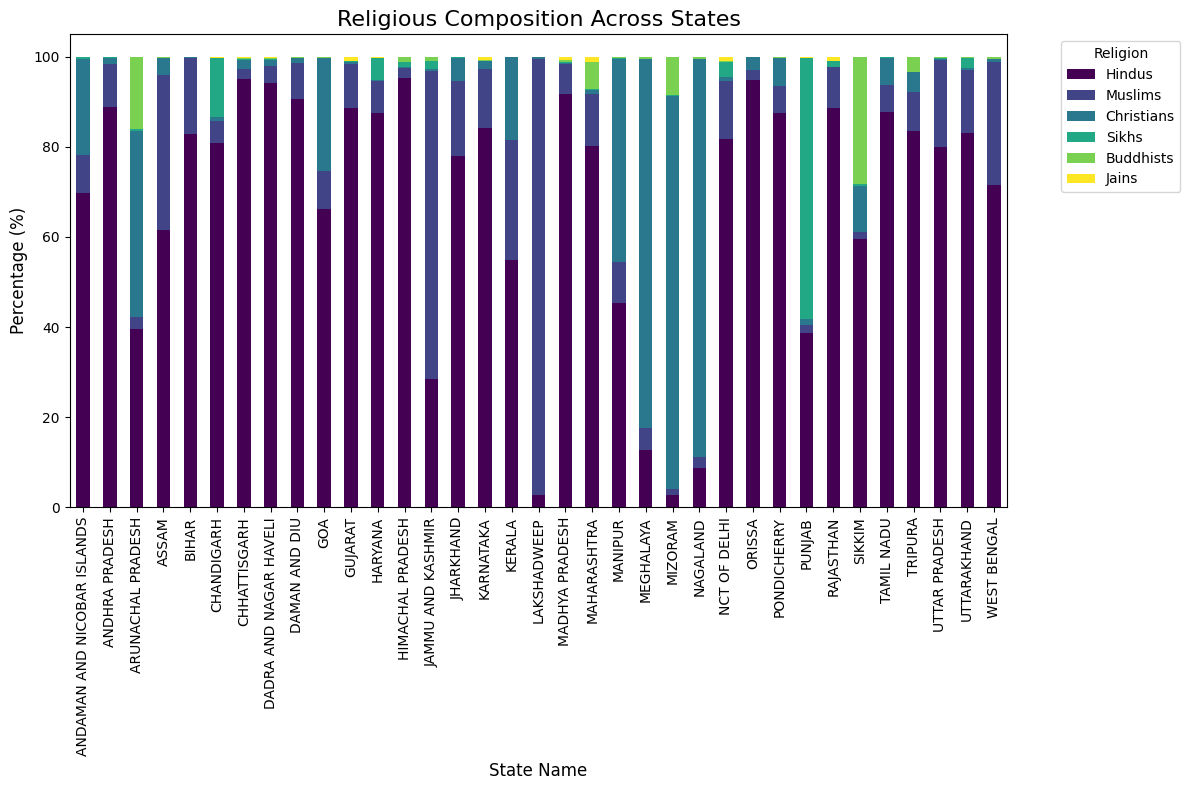

In [82]:
religion_by_state_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Religious Composition Across States', fontsize=16)
plt.xlabel('State Name', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
religion_by_state_percentage

Hindus    Muslims  Christians      Sikhs  \
State_name                                                                 
ANDAMAN AND NICOBAR ISLANDS  69.671120   8.544397   21.348208   0.339003   
ANDHRA PRADESH               88.899490   9.602813    1.342310   0.047814   
ARUNACHAL PRADESH            39.612193   2.665777   41.273659   0.323994   
ASSAM                        61.619811  34.308299    3.745446   0.066411   
BIHAR                        82.900378  16.909517    0.124475   0.022901   
CHANDIGARH                   80.874795   4.880240    0.827175  13.121828   
CHHATTISGARH                 95.175065   2.057741    1.960024   0.279838   
DADRA AND NAGAR HAVELI       94.146893   3.768127    1.490979   0.063278   
DAMAN AND DIU                90.625425   7.935436    1.160862   0.070804   
GOA                          66.234552   8.353490   25.159286   0.101220   
GUJARAT                      88.683365   9.685631    0.523774   0.096489   
HARYANA                      87.609709   7.039013    0.198971   4.914714   
HIMACHAL PRADESH             95.290207   2.186240    0.184461   1.165403   
JAMMU AND KASHMIR            28.488467  68.431966    0.284599   1.875826   
JHARKHAND                    78.008810  16.713126    4.945641   0.248996   
KARNATAKA                    84.240318  12.956880    1.875715   0.047232   
KERALA                       54.885422  26.638833   18.436553   0.011450   
LAKSHADWEEP                   2.776311  96.686438    0.492221   0.012422   
MADHYA PRADESH               91.766297   6.638012    0.296515   0.210500   
MAHARASHTRA                  80.157087  11.590795    0.965134   0.199490   
MANIPUR                      45.264257   9.185395   45.155757   0.058482   
MEGHALAYA                    12.674062   4.831310   81.993116   0.112818   
MIZORAM                       2.751211   1.354061   87.306504   0.026110   
NAGALAND                      8.771234   2.481688   88.174135   0.095795   
NCT OF DELHI                 81.755230  12.870655    0.871046   3.401957   
ORISSA                       94.884855   2.201092    2.804772   0.053094   
PONDICHERRY                  87.456158   6.065525    6.305879   0.023843   
PUNJAB                       38.626085   1.937027    1.259654  57.894082   
RAJASTHAN                    88.581489   9.076717    0.140823   1.274796   
SIKKIM                       59.526136   1.665460   10.215563   0.315301   
TAMIL NADU                   87.821075   5.878274    6.140747   0.020293   
TRIPURA                      83.550160   8.618210    4.359853   0.029178   
UTTAR PRADESH                79.969760  19.317697    0.178925   0.323016   
UTTARAKHAND                  83.074178  13.965338    0.375046   2.346111   
WEST BENGAL                  71.455693  27.362160    0.730941   0.070498   

                             Buddhists     Jains  
State_name                                        
ANDAMAN AND NICOBAR ISLANDS   0.089100  0.008172  
ANDHRA PRADESH                0.043594  0.063979  
ARUNACHAL PRADESH            16.048381  0.075996  
ASSAM                         0.176670  0.083363  
BIHAR                         0.024513  0.018216  
CHANDIGARH                    0.110037  0.185925  
CHHATTISGARH                  0.281560  0.245771  
DADRA AND NAGAR HAVELI        0.184878  0.345844  
DAMAN AND DIU                 0.089329  0.118144  
GOA                           0.075245  0.076207  
GUJARAT                       0.050498  0.960244  
HARYANA                       0.029692  0.207901  
HIMACHAL PRADESH              1.147360  0.026329  
JAMMU AND KASHMIR             0.899254  0.019889  
JHARKHAND                     0.031223  0.052203  
KARNATAKA                     0.157113  0.722743  
KERALA                        0.014266  0.013476  
LAKSHADWEEP                   0.015527  0.017080  
MADHYA PRADESH                0.300366  0.788310  
MAHARASHTRA                   5.836166  1.251327  
MANIPUR                       0.271308  0.064801  
MEGHALAYA                     0.365463  0.0232

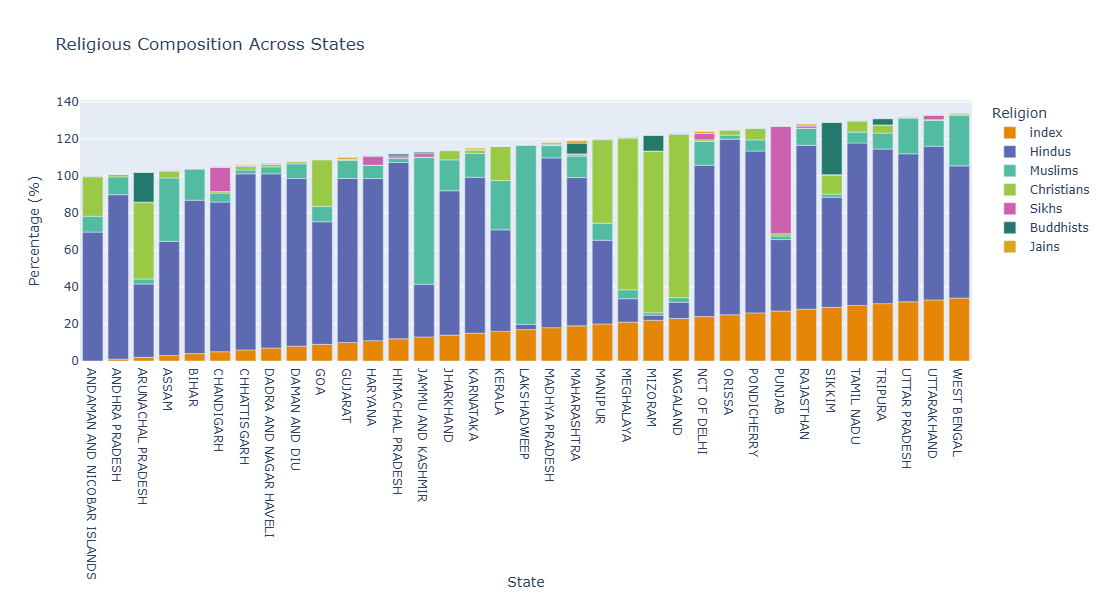

<Figure size 1400x1000 with 0 Axes>

In [89]:

religion_by_state_percentage.reset_index(inplace=True)
religion_melted = religion_by_state_percentage.melt(id_vars='State_name', 
                                                    var_name='Religion', 
                                                    value_name='Percentage')
fig = px.bar(religion_melted, x='State_name', y='Percentage', color='Religion', 
             title='Religious Composition Across States',
             labels={'Percentage': 'Percentage (%)', 'State_name': 'State'},
             color_discrete_sequence=px.colors.qualitative.Vivid,
             height=600)
fig.show()

In [88]:
religion_by_state_percentage

State_name     Hindus    Muslims  Christians      Sikhs  \
0   ANDAMAN AND NICOBAR ISLANDS  69.671120   8.544397   21.348208   0.339003   
1                ANDHRA PRADESH  88.899490   9.602813    1.342310   0.047814   
2             ARUNACHAL PRADESH  39.612193   2.665777   41.273659   0.323994   
3                         ASSAM  61.619811  34.308299    3.745446   0.066411   
4                         BIHAR  82.900378  16.909517    0.124475   0.022901   
5                    CHANDIGARH  80.874795   4.880240    0.827175  13.121828   
6                  CHHATTISGARH  95.175065   2.057741    1.960024   0.279838   
7        DADRA AND NAGAR HAVELI  94.146893   3.768127    1.490979   0.063278   
8                 DAMAN AND DIU  90.625425   7.935436    1.160862   0.070804   
9                           GOA  66.234552   8.353490   25.159286   0.101220   
10                      GUJARAT  88.683365   9.685631    0.523774   0.096489   
11                      HARYANA  87.609709   7.039013    0.198971   4.914714   
12             HIMACHAL PRADESH  95.290207   2.186240    0.184461   1.165403   
13            JAMMU AND KASHMIR  28.488467  68.431966    0.284599   1.875826   
14                    JHARKHAND  78.008810  16.713126    4.945641   0.248996   
15                    KARNATAKA  84.240318  12.956880    1.875715   0.047232   
16                       KERALA  54.885422  26.638833   18.436553   0.011450   
17                  LAKSHADWEEP   2.776311  96.686438    0.492221   0.012422   
18               MADHYA PRADESH  91.766297   6.638012    0.296515   0.210500   
19                  MAHARASHTRA  80.157087  11.590795    0.965134   0.199490   
20                      MANIPUR  45.264257   9.185395   45.155757   0.058482   
21                    MEGHALAYA  12.674062   4.831310   81.993116   0.112818   
22                      MIZORAM   2.751211   1.354061   87.306504   0.026110   
23                     NAGALAND   8.771234   2.481688   88.174135   0.095795   
24                 NCT OF DELHI  81.755230  12.870655    0.871046   3.401957   
25                       ORISSA  94.884855   2.201092    2.804772   0.053094   
26                  PONDICHERRY  87.456158   6.065525    6.305879   0.023843   
27                       PUNJAB  38.626085   1.937027    1.259654  57.894082   
28                    RAJASTHAN  88.581489   9.076717    0.140823   1.274796   
29                       SIKKIM  59.526136   1.665460   10.215563   0.315301   
30                   TAMIL NADU  87.821075   5.878274    6.140747   0.020293   
31                      TRIPURA  83.550160   8.618210    4.359853   0.029178   
32                UTTAR PRADESH  79.969760  19.317697    0.178925   0.323016   
33                  UTTARAKHAND  83.074178  13.965338    0.375046   2.346111   
34                  WEST BENGAL  71.455693  27.362160    0.730941   0.070498   

    Buddhists     Jains  
0    0.089100  0.008172  
1    0.043594  0.063979  
2   16.048381  0.075996  
3    0.176670  0.083363  
4    0.024513  0.018216  
5    0.110037  0.185925  
6    0.281560  0.245771  
7    0.184878  0.345844  
8    0.089329  0.118144  
9    0.075245  0.076207  
10   0.050498  0.960244  
11   0.029692  0.207901  
12   1.147360  0.026329  
13   0.899254  0.019889  
14   0.031223  0.052203  
15   0.157113  0.722743  
16   0.014266  0.013476  
17   0.015527  0.017080  
18   0.300366  0.788310  
19   5.836166  1.251327  
20   0.271308  0.064801  
21   0.365463  0.023230  
22   8.527788  0.034326  
23   0.342580  0.134569  
24   0.109998  0.991114  
25   0.033444  0.022743  
26   0.036206  0.112390  
27   0.120228  0.162923  
28   0.017795  0.908380  
29  28.224539  0.053000  
30   0.015547  0.124064  
31   3.419148  0.023452  
32   0.103548  0.107053  
33   0.148168  0.091158  
34   0.313963  0.066745

### 3 Are there districts where a single religion dominates significantly? 

In [141]:
data['Total_Population'] = data[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].sum(axis=1)

# Calculate the percentage
religion_percentages = data[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].div(data['Total_Population'], axis=0) * 100

# Add district names for reference
religion_percentages['District_name'] = data['District_name']

# Identify the dominant religion in each district
religion_percentages['Dominant_Religion'] = religion_percentages[['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']].idxmax(axis=1)

religion_percentages['Dominance_Percentage'] = religion_percentages[
    ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains']
].max(axis=1)  

dominant_districts = religion_percentages[religion_percentages['Dominance_Percentage'] > 80]

dominant_districts[['District_name', 'Dominant_Religion', 'Dominance_Percentage']]


District_name Dominant_Religion  Dominance_Percentage
0         Kupwara           Muslims             94.868400
1          Badgam           Muslims             97.715147
4           Punch           Muslims             90.581616
6          Kathua            Hindus             87.713004
7        Baramula           Muslims             95.323491
..            ...               ...                   ...
630   Krishnagiri            Hindus             91.885693
631    Coimbatore            Hindus             88.227776
632      Tiruppur            Hindus             92.116683
633         Yanam            Hindus             96.273984
634   PONDICHERRY            Hindus             90.198527

[452 rows x 3 columns]

In [142]:
religion_percentages

Hindus    Muslims  Christians     Sikhs  Buddhists     Jains  \
0     4.278311  94.868400    0.195893  0.645296   0.007605  0.004494   
1     1.342157  97.715147    0.197673  0.737987   0.006240  0.000797   
2    17.278954  14.390570    0.496878  0.824605  66.931215  0.077779   
3     7.359671  77.033500    0.429866  0.833399  14.323638  0.019928   
4     6.847825  90.581616    0.201209  2.349818   0.017433  0.002100   
..         ...        ...         ...       ...        ...       ...   
635  66.854900  30.761868    2.292305  0.007178   0.050249  0.033499   
636  76.308698  14.415554    9.194259  0.022997   0.031496  0.026996   
637  23.747128   3.654667   71.334391  0.938286   0.325528  0.000000   
638  77.031785   2.054801   20.756812  0.073081   0.079724  0.003796   
639  73.475439  12.177114   13.914475  0.364741   0.056859  0.011372   

                 District_name Dominant_Religion  Dominance_Percentage  
0                      Kupwara           Muslims             94.868400  
1                       Badgam           Muslims             97.715147  
2                  Leh(Ladakh)         Buddhists             66.931215  
3                       Kargil           Muslims             77.033500  
4                        Punch           Muslims             90.581616  
..                         ...               ...                   ...  
635                       Mahe            Hindus             66.854900  
636                   Karaikal            Hindus             76.308698  
637                   Nicobars        Christians             71.334391  
638  North  AND Middle Andaman            Hindus             77.031785  
639              South Andaman            Hindus             73.475439  

[640 rows x 9 columns]

# Education

### 1 What is the distribution of secondary education levels across districts? 

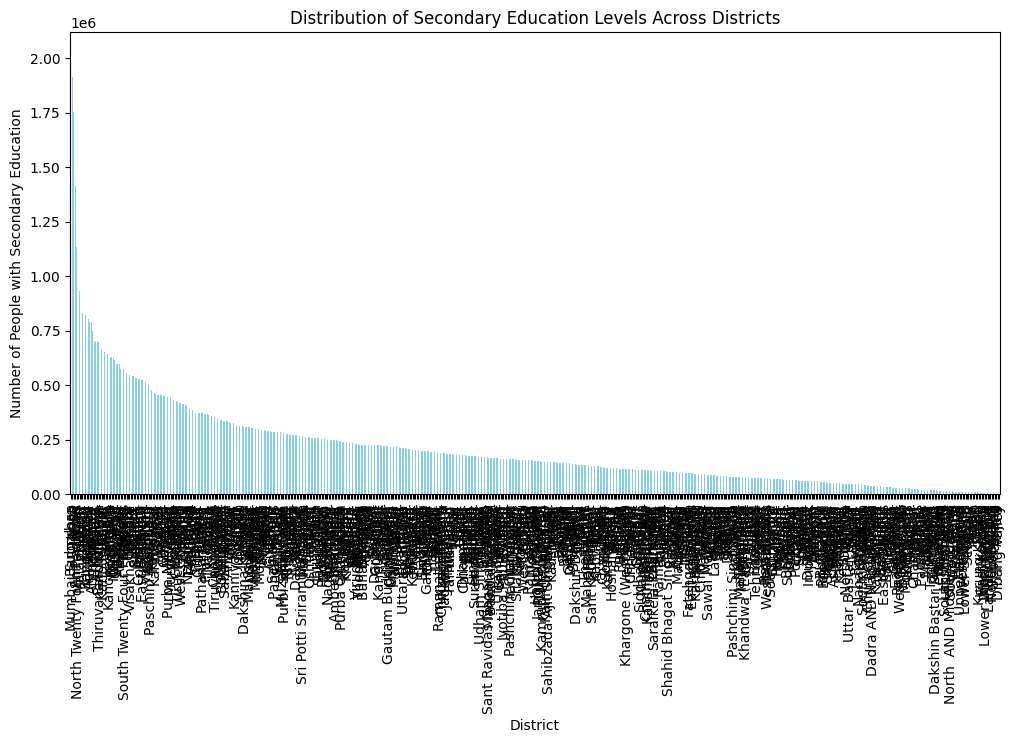

In [95]:
district_secondary_education = data.groupby('District_name')['Secondary_Education'].sum()

district_secondary_education = district_secondary_education.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
district_secondary_education.plot(kind='bar', color='skyblue')
plt.title('Distribution of Secondary Education Levels Across Districts')
plt.xlabel('District')
plt.ylabel('Number of People with Secondary Education')
plt.xticks(rotation=90) 
plt.show()

In [96]:
district_secondary_education

District_name
Bangalore          2018079
Mumbai Suburban    1914168
Thane              1751284
Pune               1414563
Ahmadabad          1135058
                    ...   
North  District       3223
Upper Siang           2935
Tawang                2140
Anjaw                 1167
Dibang Valley          809
Name: Secondary_Education, Length: 634, dtype: int64

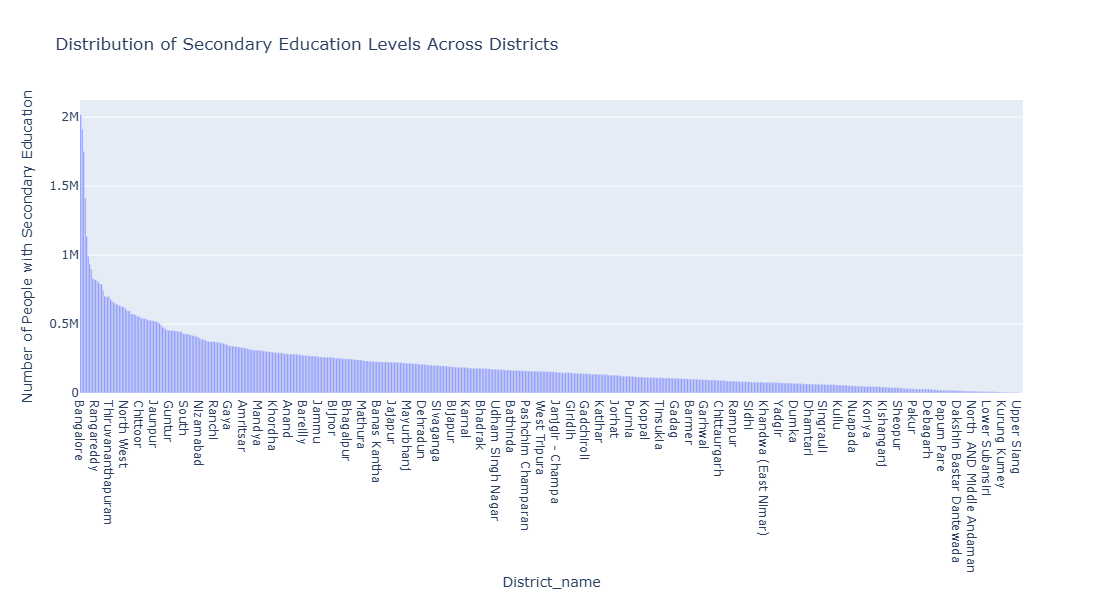

In [98]:
fig = px.bar(district_secondary_education,
             x=district_secondary_education.index, 
             y=district_secondary_education.values,  
             title='Distribution of Secondary Education Levels Across Districts', 
             labels={'x': 'District', 'y': 'Number of People with Secondary Education'}) 
fig.update_layout(
    width=1200, 
    height=600   
)
fig.show()

### 2 How does the percentage of people with higher education vary across states? 

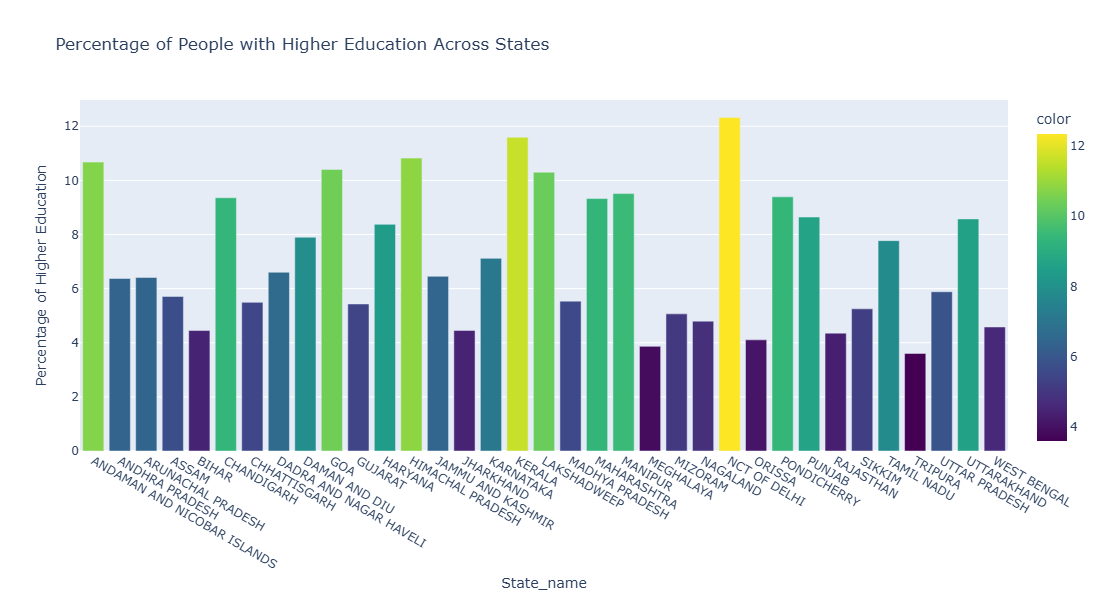

In [100]:

data['Higher_Education_Percentage'] = (data['Higher_Education'] / data['Population']) * 100

state_higher_education = data.groupby('State_name')['Higher_Education_Percentage'].mean()

# Create a bar plot using Plotly
fig = px.bar(state_higher_education,
             x=state_higher_education.index,  
             y=state_higher_education.values, 
             title='Percentage of People with Higher Education Across States',  
             labels={'x': 'State', 'y': 'Percentage of Higher Education'},
             color=state_higher_education.values,  
             color_continuous_scale='Viridis',height=600) 

fig.show()


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\919128259.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




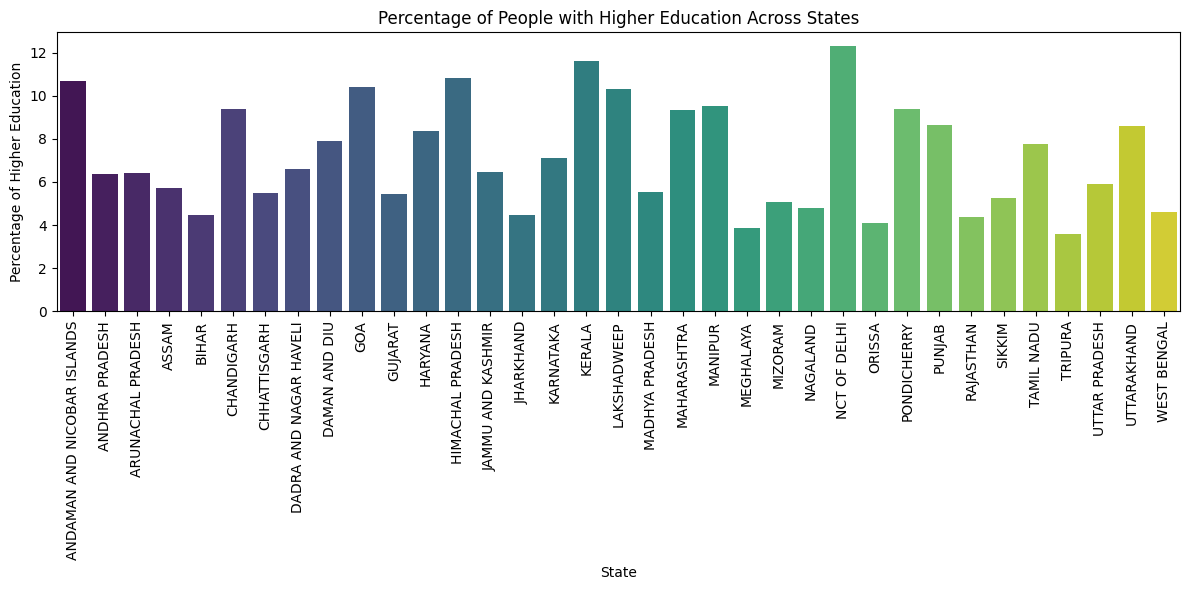

In [102]:
data['Higher_Education_Percentage'] = (data['Higher_Education'] / data['Population']) * 100

# Group by State and calculate the average percentage (or sum if needed) of higher education
state_higher_education = data.groupby('State_name')['Higher_Education_Percentage'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='State_name', y='Higher_Education_Percentage', data=state_higher_education, palette='viridis')
plt.xticks(rotation=90)
plt.title('Percentage of People with Higher Education Across States')
plt.xlabel('State')
plt.ylabel('Percentage of Higher Education')

plt.tight_layout()
plt.show()

### 3 Which states or districts have the highest levels of secondary, higher, and graduate education? 

In [105]:
data['Secondary_Education_Percentage'] = (data['Secondary_Education'] / data['Population']) * 100
data['Higher_Education_Percentage'] = (data['Higher_Education'] / data['Population']) * 100
data['Graduate_Education_Percentage'] = (data['Graduate_Education'] / data['Population']) * 100


top_secondary = data[['State_name', 'District_name', 'Secondary_Education_Percentage']].sort_values(by='Secondary_Education_Percentage', ascending=False).head(5)

top_higher = data[['State_name', 'District_name', 'Higher_Education_Percentage']].sort_values(by='Higher_Education_Percentage', ascending=False).head(5)

top_graduate = data[['State_name', 'District_name', 'Graduate_Education_Percentage']].sort_values(by='Graduate_Education_Percentage', ascending=False).head(5)

print("Top 5 States/Districts with the Highest Secondary Education:")
print(top_secondary)

print("\nTop 5 States/Districts with the Highest Higher Education:")
print(top_higher)

print("\nTop 5 States/Districts with the Highest Graduate Education:")
print(top_graduate)




Top 5 States/Districts with the Highest Secondary Education:
    State_name   District_name  Secondary_Education_Percentage
598     KERALA  Pathanamthitta                       30.994177
597     KERALA       Alappuzha                       26.943743
593     KERALA        Thrissur                       26.330610
596     KERALA        Kottayam                       24.092768
595     KERALA          Idukki                       23.556639

Top 5 States/Districts with the Highest Higher Education:
           State_name   District_name  Higher_Education_Percentage
598            KERALA  Pathanamthitta                    14.438138
596            KERALA        Kottayam                    14.216903
89       NCT OF DELHI      North West                    14.215847
27   HIMACHAL PRADESH        Hamirpur                    14.152931
92       NCT OF DELHI            East                    13.758888

Top 5 States/Districts with the Highest Graduate Education:
       State_name District_name  Gradua

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1413936541.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




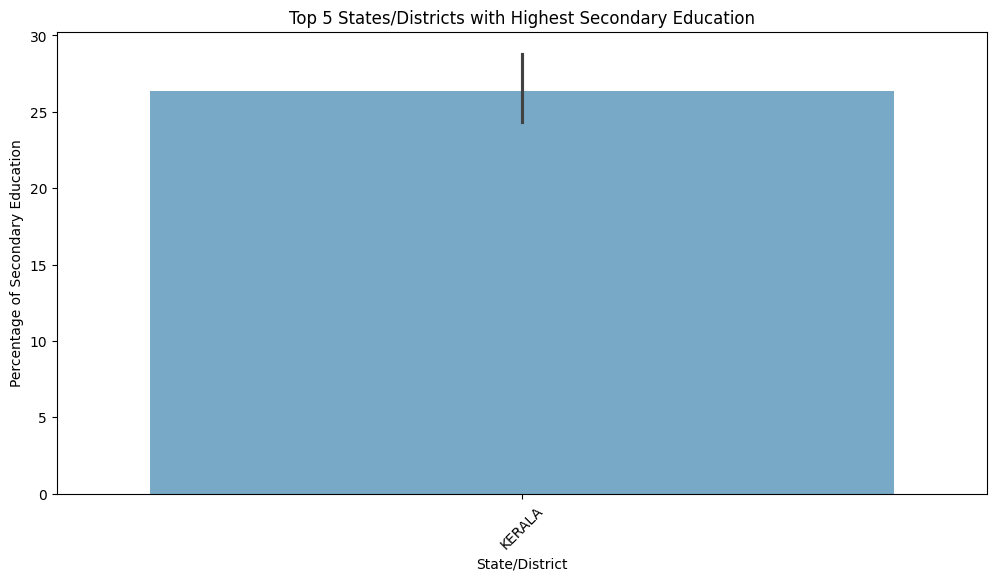

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1413936541.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




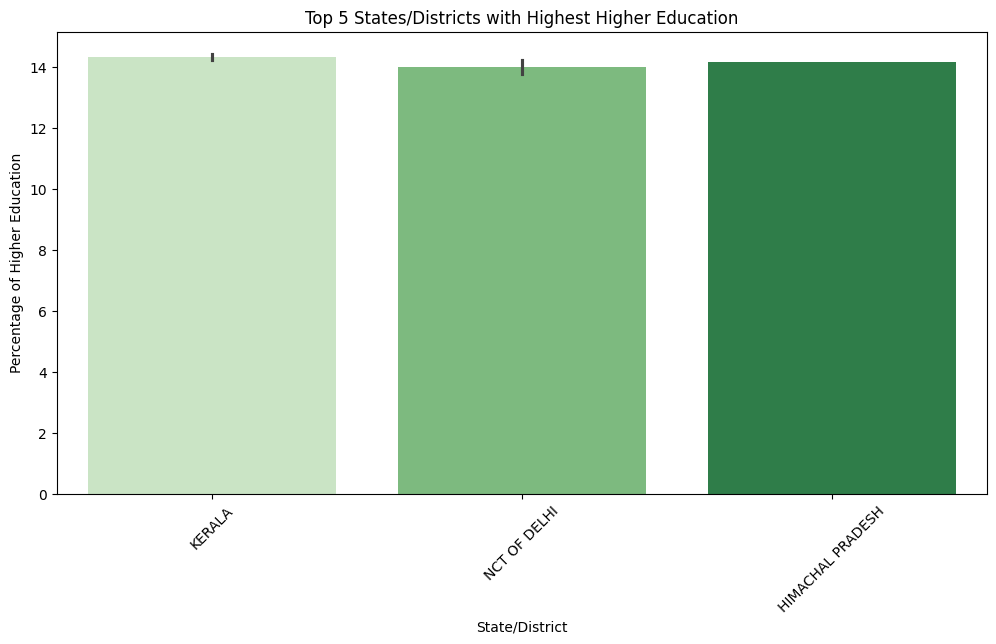

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1413936541.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




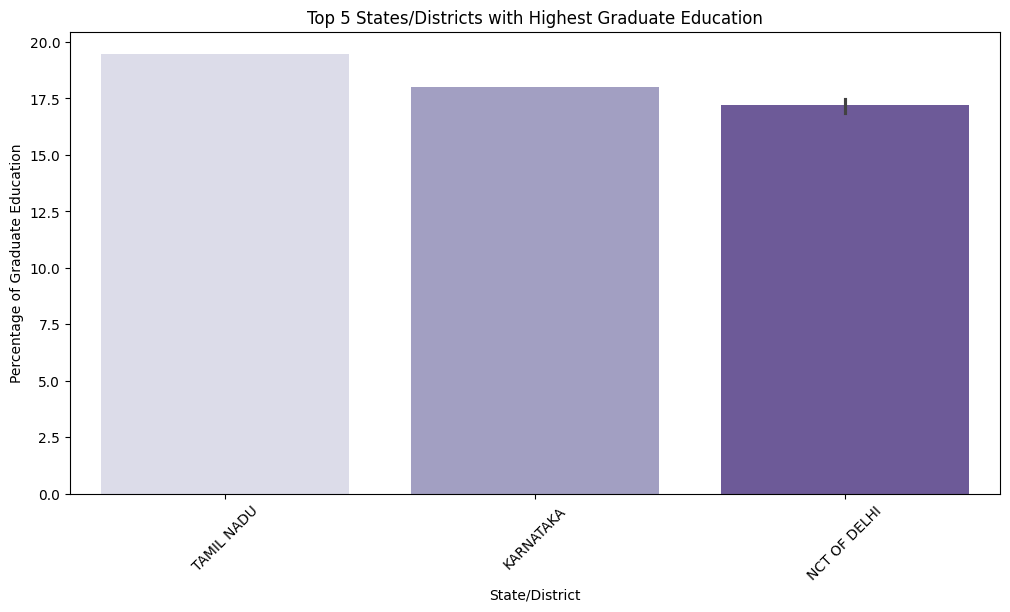

In [106]:
plt.figure(figsize=(12, 6))

# Plotting the top secondary education
sns.barplot(x='State_name', y='Secondary_Education_Percentage', data=top_secondary, palette='Blues')
plt.title('Top 5 States/Districts with Highest Secondary Education')
plt.xlabel('State/District')
plt.ylabel('Percentage of Secondary Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))

# Plotting the top higher education
sns.barplot(x='State_name', y='Higher_Education_Percentage', data=top_higher, palette='Greens')
plt.title('Top 5 States/Districts with Highest Higher Education')
plt.xlabel('State/District')
plt.ylabel('Percentage of Higher Education')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))

# Plotting the top graduate education
sns.barplot(x='State_name', y='Graduate_Education_Percentage', data=top_graduate, palette='Purples')
plt.title('Top 5 States/Districts with Highest Graduate Education')
plt.xlabel('State/District')
plt.ylabel('Percentage of Graduate Education')
plt.xticks(rotation=45)
plt.show()

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1336742755.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1336742755.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_2404\1336742755.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




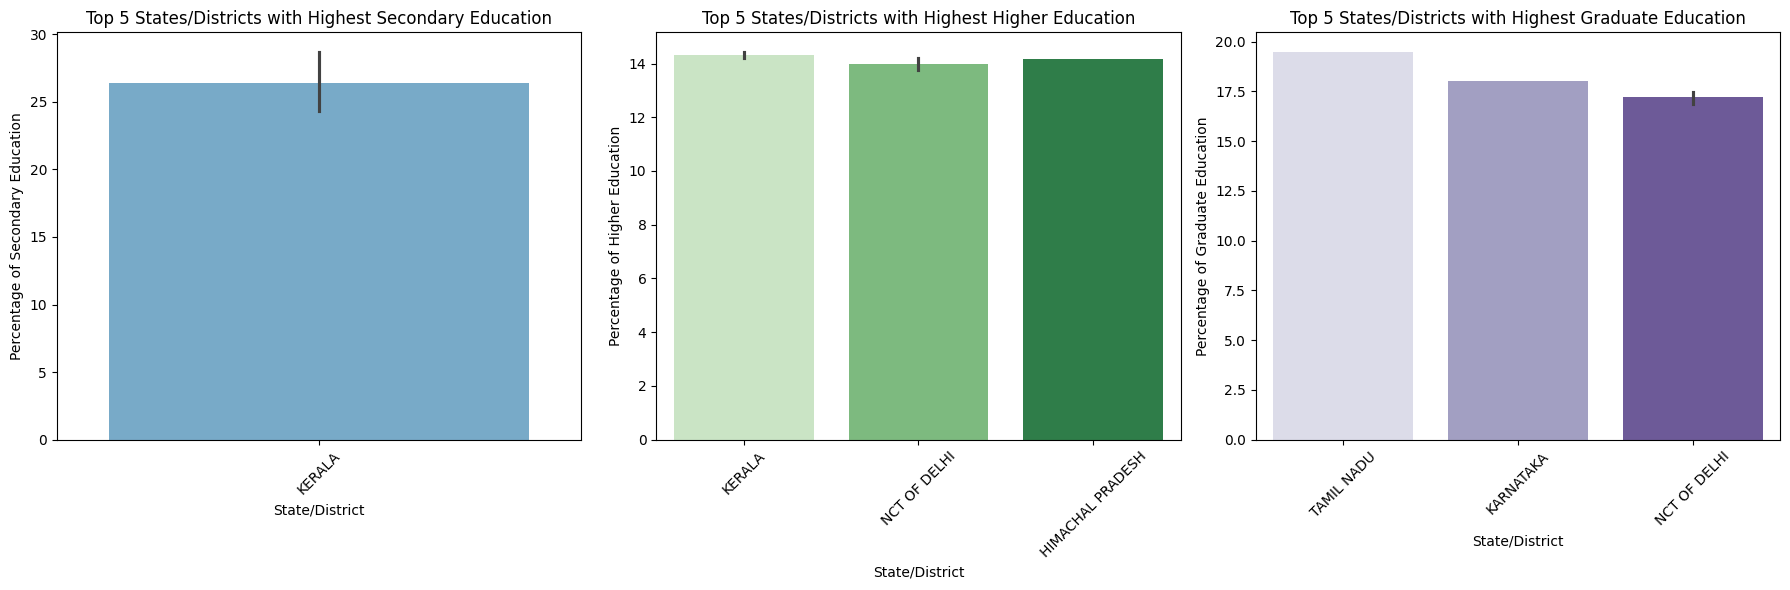

In [107]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='State_name', y='Secondary_Education_Percentage', data=top_secondary, palette='Blues', ax=axes[0])
axes[0].set_title('Top 5 States/Districts with Highest Secondary Education')
axes[0].set_xlabel('State/District')
axes[0].set_ylabel('Percentage of Secondary Education')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='State_name', y='Higher_Education_Percentage', data=top_higher, palette='Greens', ax=axes[1])
axes[1].set_title('Top 5 States/Districts with Highest Higher Education')
axes[1].set_xlabel('State/District')
axes[1].set_ylabel('Percentage of Higher Education')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='State_name', y='Graduate_Education_Percentage', data=top_graduate, palette='Purples', ax=axes[2])
axes[2].set_title('Top 5 States/Districts with Highest Graduate Education')
axes[2].set_xlabel('State/District')
axes[2].set_ylabel('Percentage of Graduate Education')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [108]:
## 4 How is the population distributed across age groups (0-29, 30-49, 50+) in different districts? 

In [109]:

data['Age_Group_0_29_Percentage'] = (data['Age_Group_0_29'] / data['Population']) * 100
data['Age_Group_30_49_Percentage'] = (data['Age_Group_30_49'] / data['Population']) * 100
data['Age_Group_50_Percentage'] = (data['Age_Group_50'] / data['Population']) * 100


In [110]:
# Reshape the data to long format for Seaborn
age_group_distribution = data[['District_name', 'Age_Group_0_29_Percentage', 
                              'Age_Group_30_49_Percentage', 'Age_Group_50_Percentage']]
age_group_distribution = age_group_distribution.melt(id_vars='District_name', 
                                                      var_name='Age_Group', 
                                                      value_name='Percentage')


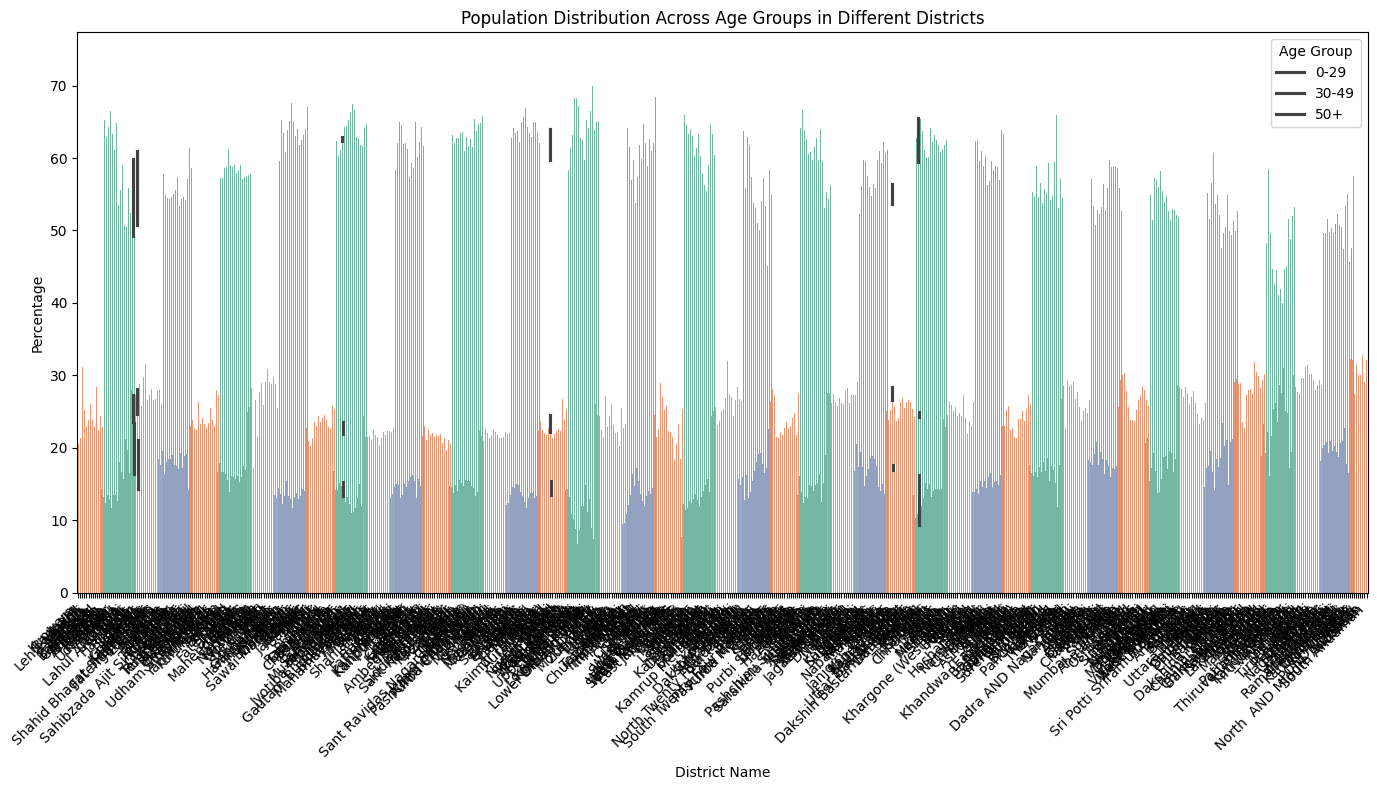

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(x='District_name', y='Percentage', hue='Age_Group', data=age_group_distribution, palette='Set2')
plt.title('Population Distribution Across Age Groups in Different Districts')
plt.xlabel('District Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', labels=['0-29', '30-49', '50+'])
plt.tight_layout()
plt.show()
